**Data Science and Decision Making Assignement 1**


---



#Brigthon Data Visualization

##Exploratory Data Analysis

In [4]:
#Brigthon Data Visualization
#Important Libraries to be used in the code
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

In [109]:
# For seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose, STL
# Import additional functions needed
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
#imports to get data from the GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#Mounting the path for the data
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./Project documentation-20240129/weatherdata_for_students')
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive',GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['colchester_001.csv', 'colchester_002.csv', 'colchester_003.csv', 'colchester_004.csv', 'colchester_005.csv', 'colchester_007.csv', 'colchester_006.csv', 'colchester_008.csv', 'colchester_009.csv', 'colchester_010.csv', 'colchester_012.csv', 'colchester_011.csv', 'colchester_013.csv', 'colchester_014.csv', 'colchester_016.csv', 'colchester_015.csv', 'colchester_018.csv', 'colchester_017.csv', 'colchester_020.csv', 'colchester_019.csv', 'colchester_021.csv', 'colchester_022.csv', 'colchester_023.csv', 'colchester_024.csv', 'colchester_025.csv', 'colchester_026.csv', 'colchester_027.csv', 'colchester_028.csv', 'colchester_029.csv', 'colchester_030.csv', 'colchester_031.csv', 'colchester_032.csv', 'colchester_034.csv', 'colchester_033.csv', 'colchester_037.csv', 'colchester_036.csv', 'colchester_035.csv', 'colchester_038.csv', 'colchester_039.csv', 'colchester_040.csv', 'colchester_042.csv', 'colchester_041.csv', 'colchester_044.csv', 'colchester_043.csv', 'colchester_045.cs

In [6]:
import os
import pandas as pd

# Specify the folder directory where the dataset is located.
df_path = GOOGLE_DRIVE_PATH

#list of all files in the path
file_list = [file for file in os.listdir(GOOGLE_DRIVE_PATH) if file.endswith('.csv')]

brighton_df = []

# Iterate over each CSV file
for file_ in file_list:
    # Construct the full path to the CSV file
    file_path = os.path.join(df_path, file_)

    # Check for file has an index column named '0'
    index_column = pd.read_csv(file_path, nrows=1).columns[0] == '0'

    # Change header value based on the  value of the column
    header = 1 if index_column else "infer"

    current_dataframe = pd.read_csv(file_path, header=header)

    # If the file name contains "Brighton", add its DataFrame to the list
    if file_.startswith('brighton'):
        brighton_df.append(current_dataframe)

# Concantenate all the datasets into one
f_brighton_df = pd.concat(brighton_df, ignore_index=True)

In [7]:
#information about the DataFrame
print(f_brighton_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122844 entries, 0 to 122843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          122844 non-null  object 
 1   temp              122590 non-null  float64
 2   dew               122568 non-null  float64
 3   humidity          122575 non-null  float64
 4   precip            122565 non-null  float64
 5   precipprob        122558 non-null  float64
 6   preciptype        11277 non-null   object 
 7   snow              89810 non-null   float64
 8   snowdepth         89279 non-null   float64
 9   windspeed         122583 non-null  float64
 10  winddir           122567 non-null  float64
 11  sealevelpressure  122319 non-null  float64
 12  cloudcover        122556 non-null  float64
 13  solarradiation    122514 non-null  float64
 14  solarenergy       122480 non-null  float64
 15  uvindex           122486 non-null  float64
dtypes: float64(14), obje

In [8]:
# Print dimensions of the dataset
print("Dataset dimensions:", f_brighton_df.shape)

Dataset dimensions: (122844, 16)


In [11]:
# Print first 2 rows of the dataset
print("First few rows of the dataset:")
print(f_brighton_df.head(2))

First few rows of the dataset:
              datetime  temp  dew  humidity  precip  precipprob preciptype  \
0  2010-03-22T00:00:00   4.4  4.3     99.49     0.0         0.0        NaN   
1  2010-03-22T01:00:00   4.8  4.8     99.82     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   0.0        0.0        5.7    185.0            1021.1        40.0   
1   0.0        0.0        5.9    162.0            1020.9        91.9   

   solarradiation  solarenergy  uvindex  
0             0.0          0.0      0.0  
1             0.0          0.0      0.0  


In [12]:
# Summary
print("Summary:")
print(f_brighton_df.describe())

Summary:
                temp            dew       humidity         precip  \
count  122590.000000  122568.000000  122575.000000  122565.000000   
mean       11.059431       8.047911      82.880536       0.081954   
std         5.654195       5.136014      12.511270       0.660720   
min        -9.100000     -11.600000      24.340000       0.000000   
25%         7.200000       4.500000      75.560000       0.000000   
50%        11.000000       8.400000      85.700000       0.000000   
75%        15.300000      12.000000      92.790000       0.000000   
max        33.300000      20.200000     100.000000      32.385000   

          precipprob          snow     snowdepth      windspeed  \
count  122558.000000  89810.000000  89279.000000  122583.000000   
mean        8.883141      0.000408      0.028941      15.938294   
std        28.450141      0.034549      0.441740       8.903724   
min         0.000000      0.000000      0.000000       0.000000   
25%         0.000000      0.000000

In [13]:
# Counting for missing values
print("Missing values:")
print(f_brighton_df.isnull().sum())

Missing values:
datetime                 0
temp                   254
dew                    276
humidity               269
precip                 279
precipprob             286
preciptype          111567
snow                 33034
snowdepth            33565
windspeed              261
winddir                277
sealevelpressure       525
cloudcover             288
solarradiation         330
solarenergy            364
uvindex                358
dtype: int64


In [14]:
# Info about  categorical variables
print("Categories & frequencies for categorical variables:")
for col in f_brighton_df.select_dtypes(include='object').columns:
    print(f_brighton_df[col].value_counts())

Categories & frequencies for categorical variables:
2020-10-25T01:00:00    2
2014-10-26T01:00:00    2
2017-10-29T01:00:00    2
2022-10-30T01:00:00    2
2023-10-29T01:00:00    2
                      ..
2014-09-03T02:00:00    1
2014-09-03T01:00:00    1
2014-09-03T00:00:00    1
2014-09-02T23:00:00    1
2023-10-19T23:00:00    1
Name: datetime, Length: 122830, dtype: int64
rain         10903
rain,snow      344
snow            30
Name: preciptype, dtype: int64


## Graphs for EDA

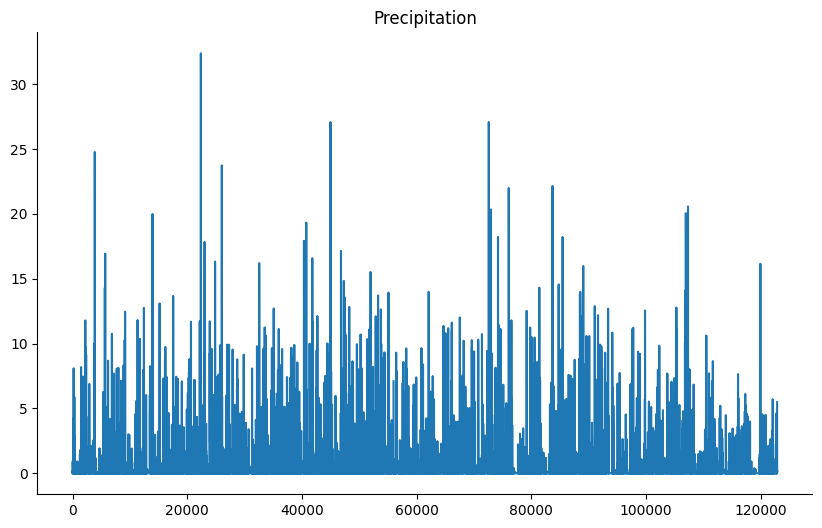

In [16]:
# @title Precipitation

from matplotlib import pyplot as plt
f_brighton_df['precip'].plot(kind='line', figsize=(10, 6), title='Precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
# @title Temperature

from matplotlib import pyplot as plt
f_brighton_df['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

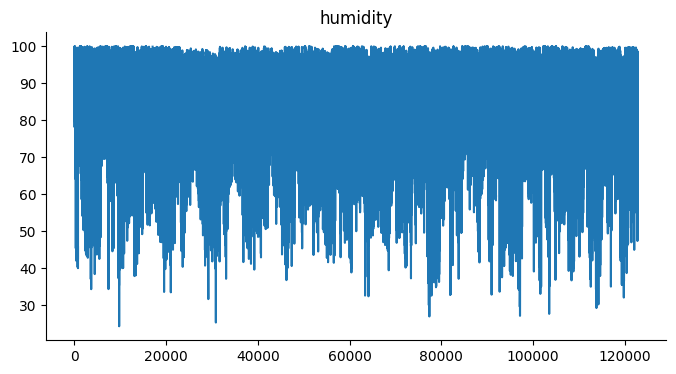

In [19]:
# @title Humidity

from matplotlib import pyplot as plt
f_brighton_df['humidity'].plot(kind='line', figsize=(8, 4), title='humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
# @title DateTime VS Precipitation

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('rocket'))
  xs = series['datetime']
  ys = series['precip']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f_brighton_df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('preciptype')):
  _plot_series(series, series_name, i)
  fig.legend(title='preciptype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('Precipitation')

In [21]:
# @title Time VS Dew

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('flare'))
  xs = series['datetime']
  ys = series['dew']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f_brighton_df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('preciptype')):
  _plot_series(series, series_name, i)
  fig.legend(title='preciptype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Dew')

In [22]:
# @title Time VS Humidity

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('crest'))
  xs = series['datetime']
  ys = series['humidity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f_brighton_df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('preciptype')):
  _plot_series(series, series_name, i)
  fig.legend(title='preciptype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Humidity')

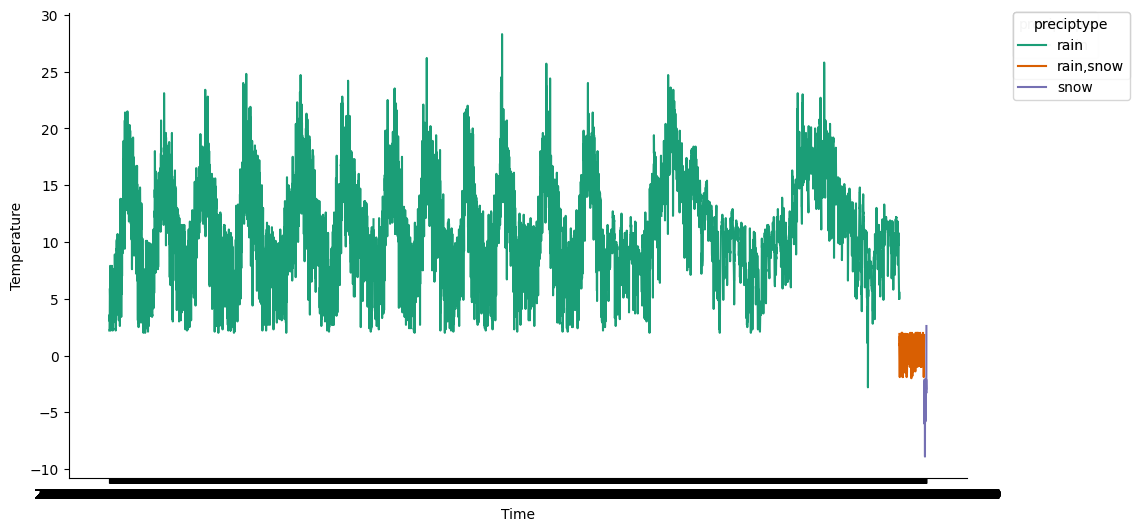

In [23]:
# @title Time vs Temperature

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['temp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f_brighton_df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('preciptype')):
  _plot_series(series, series_name, i)
  fig.legend(title='preciptype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Temperature')

<Axes: xlabel='precip', ylabel='precipprob'>

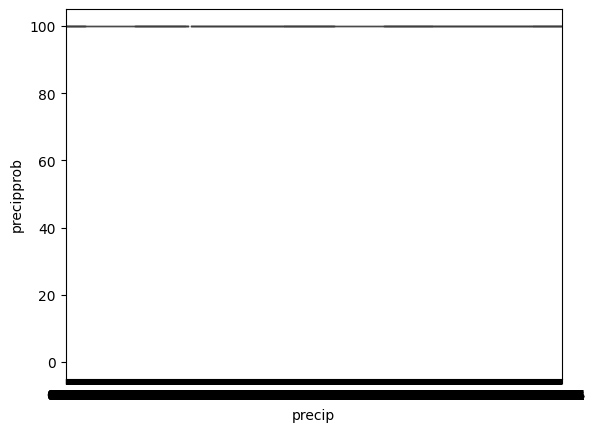

In [27]:
# @title Precipitaion VS Precipitation Probability

from matplotlib import pyplot as plt
sns.boxplot(x=f_brighton_df['precip'], y=f_brighton_df['precipprob'])


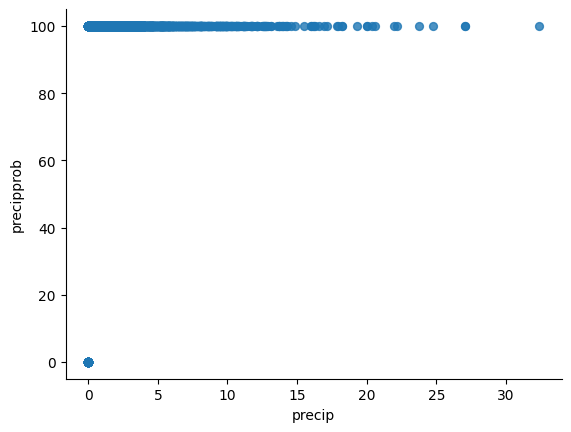

In [28]:
# @title Precipitaion VS Precipitation Probability
from matplotlib import pyplot as plt
f_brighton_df.plot(kind='scatter', x='precip', y='precipprob', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

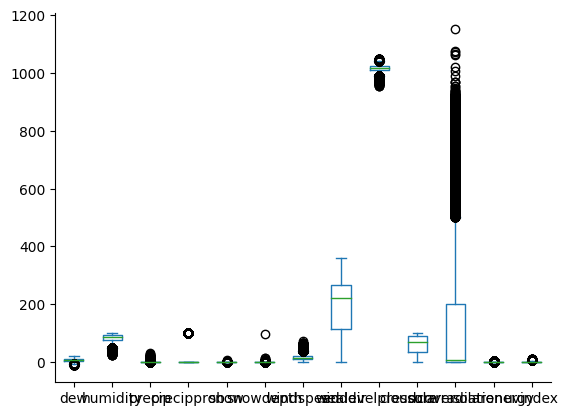

In [30]:
# @title Temperature vs Dew

from matplotlib import pyplot as plt
f_brighton_df.plot(kind='box', x='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
# @title Dew VS Humidity

from matplotlib import pyplot as plt
f_brighton_df.plot(kind='box', x='dew', y='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
# @title Humidity VS Precipitation

from matplotlib import pyplot as plt
f_brighton_df.plot(kind='scatter', x='humidity', y='precip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###Exploring Important Columns

In [35]:
# @title Precipitation Type

from matplotlib import pyplot as plt
import seaborn as sns
f_brighton_df.groupby('preciptype').size().plot(kind='barh', color=sns.palettes.mpl_palette('cubehelix'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
# @title Temperature

from matplotlib import pyplot as plt
f_brighton_df['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

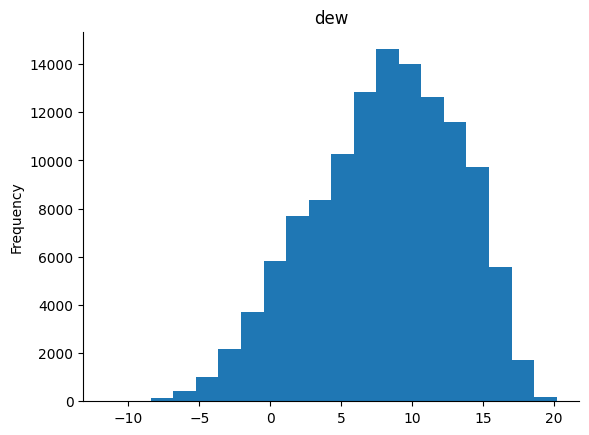

In [37]:
# @title Dew

from matplotlib import pyplot as plt
f_brighton_df['dew'].plot(kind='hist', bins=20, title='dew')
plt.gca().spines[['top', 'right',]].set_visible(False)

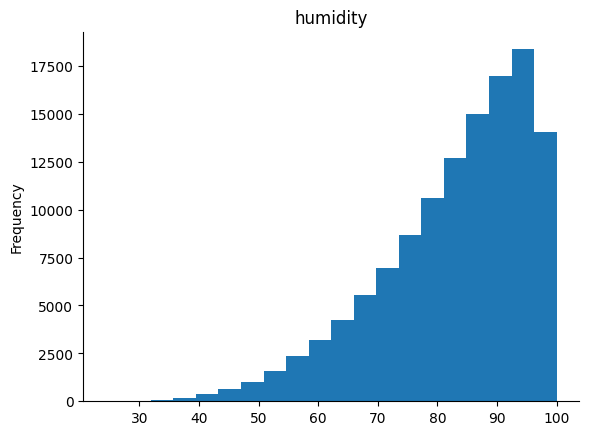

In [38]:
# @title Humidity

from matplotlib import pyplot as plt
f_brighton_df['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

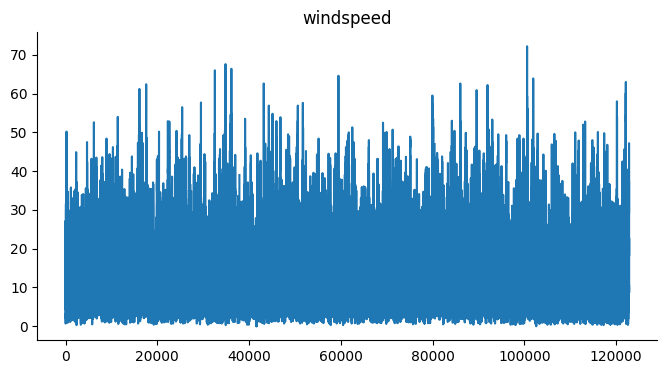

In [39]:
# @title Windspeed
from matplotlib import pyplot as plt
f_brighton_df['windspeed'].plot(kind='line', figsize=(8, 4), title='windspeed')
plt.gca().spines[['top', 'right']].set_visible(False)

##Time Series Analysis

In [98]:
months_of_the_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [65]:
f_brighton_df.columns

Index(['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex'],
      dtype='object')

In [66]:
# Date will be our index. Let's convert it to a datetime type
f_brighton_df['datetime'] = pd.to_datetime(f_brighton_df['datetime'], dayfirst=True)
f_brighton_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122844 entries, 0 to 122843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          122844 non-null  datetime64[ns]
 1   temp              122590 non-null  float64       
 2   dew               122568 non-null  float64       
 3   humidity          122575 non-null  float64       
 4   precip            122565 non-null  float64       
 5   precipprob        122558 non-null  float64       
 6   preciptype        11277 non-null   object        
 7   snow              89810 non-null   float64       
 8   snowdepth         89279 non-null   float64       
 9   windspeed         122583 non-null  float64       
 10  winddir           122567 non-null  float64       
 11  sealevelpressure  122319 non-null  float64       
 12  cloudcover        122556 non-null  float64       
 13  solarradiation    122514 non-null  float64       
 14  sola

In [68]:
print(f_brighton_df['datetime'].min(), f_brighton_df['datetime'].max())

2010-01-01 00:00:00 2024-01-06 11:00:00


In [70]:
# Let's say we want to create extra columns: month, year, and week of the year
df = f_brighton_df.copy()
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['week_of_year'] = df['datetime'].dt.isocalendar().week
df

datetime  temp   dew  humidity  precip  precipprob  \
0      2010-03-22 00:00:00   4.4   4.3     99.49   0.000         0.0   
1      2010-03-22 01:00:00   4.8   4.8     99.82   0.000         0.0   
2      2010-03-22 02:00:00   5.4   5.4     99.84   0.000         0.0   
3      2010-03-22 03:00:00   5.1   5.0     99.80   0.000         0.0   
4      2010-03-22 04:00:00   5.3   5.3     99.67   0.000         0.0   
...                    ...   ...   ...       ...     ...         ...   
122839 2023-10-19 19:00:00  15.6  13.6     87.91   0.092       100.0   
122840 2023-10-19 20:00:00  15.4  14.4     93.61   0.776       100.0   
122841 2023-10-19 21:00:00  15.2  14.5     95.47   0.717       100.0   
122842 2023-10-19 22:00:00  14.9  14.3     96.19   1.655       100.0   
122843 2023-10-19 23:00:00  14.3  13.9     97.85   5.487       100.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
0             NaN   0.0        0.0        5.7    185.0            1021.1   
1             NaN   0.0        0.0        5.9    162.0            1020.9   
2             NaN   0.0        0.0        6.0    178.0            1020.8   
3             NaN   0.0        0.0        6.2    178.0            1020.4   
4             NaN   0.0        0.0        5.9    155.0            1020.0   
...           ...   ...        ...        ...      ...               ...   
122839       rain   0.0        0.0       14.5    151.0             982.2   
122840       rain   0.0        0.0       13.2    137.0             981.9   
122841       rain   0.0        0.0       13.2    116.0             981.7   
122842       rain   0.0        0.0        8.7     95.0             981.2   
122843       rain   0.0        0.0       10.3     56.0             980.0   

        cloudcover  solarradiation  solarenergy  uvindex  month  year  \
0             40.0             0.0          0.0      0.0      3  2010   
1             91.9             0.0          0.0      0.0      3  2010   
2            100.0             0.0          0.0      0.0      3  2010   
3             29.9             0.0          0.0      0.0      3  2010   
4             36.4             0.0          0.0      0.0      3  2010   
...            ...             ...          ...      ...    ...   ...   
122839        90.2             0.0          0.0      0.0     10  2023   
122840        94.1             0.0          0.0      0.0     10  2023   
122841        94.1             0.0          0.0      0.0     10  2023   
122842        91.6             0.0          0.0      0.0     10  2023   
122843        91.6             0.0          0.0      0.0     10  2023   

        week_of_year  
0                 12  
1                 12  
2                 12  
3                 12  
4                 12  
...              ...  
122839            42  
122840            42  
122841            42  
122842            42  
122843            42  

[122844 rows x 19 columns]

In [72]:
# Let's make the date column the index of the dataframe for easier slicing
df.set_index('datetime', inplace=True) # note we can only run this once, as it will delete the 'date' column.
df.head()

temp  dew  humidity  precip  precipprob preciptype  snow  \
datetime                                                                        
2010-03-22 00:00:00   4.4  4.3     99.49     0.0         0.0        NaN   0.0   
2010-03-22 01:00:00   4.8  4.8     99.82     0.0         0.0        NaN   0.0   
2010-03-22 02:00:00   5.4  5.4     99.84     0.0         0.0        NaN   0.0   
2010-03-22 03:00:00   5.1  5.0     99.80     0.0         0.0        NaN   0.0   
2010-03-22 04:00:00   5.3  5.3     99.67     0.0         0.0        NaN   0.0   

                     snowdepth  windspeed  winddir  sealevelpressure  \
datetime                                                               
2010-03-22 00:00:00        0.0        5.7    185.0            1021.1   
2010-03-22 01:00:00        0.0        5.9    162.0            1020.9   
2010-03-22 02:00:00        0.0        6.0    178.0            1020.8   
2010-03-22 03:00:00        0.0        6.2    178.0            1020.4   
2010-03-22 04:00:00        0.0        5.9    155.0            1020.0   

                     cloudcover  solarradiation  solarenergy  uvindex  month  \
datetime                                                                       
2010-03-22 00:00:00        40.0             0.0          0.0      0.0      3   
2010-03-22 01:00:00        91.9             0.0          0.0      0.0      3   
2010-03-22 02:00:00       100.0             0.0          0.0      0.0      3   
2010-03-22 03:00:00        29.9             0.0          0.0      0.0      3   
2010-03-22 04:00:00        36.4             0.0          0.0      0.0      3   

                     year  week_of_year  
datetime                                 
2010-03-22 00:00:00  2010            12  
2010-03-22 01:00:00  2010            12  
2010-03-22 02:00:00  2010            12  
2010-03-22 03:00:00  2010            12  
2010-03-22 04:00:00  2010            12

In [74]:
print(df.isna().any())
df=df.dropna()
print(df.isna().any())

temp                 True
dew                  True
humidity             True
precip               True
precipprob           True
preciptype           True
snow                 True
snowdepth            True
windspeed            True
winddir              True
sealevelpressure     True
cloudcover           True
solarradiation       True
solarenergy          True
uvindex              True
month               False
year                False
week_of_year        False
dtype: bool
temp                False
dew                 False
humidity            False
precip              False
precipprob          False
preciptype          False
snow                False
snowdepth           False
windspeed           False
winddir             False
sealevelpressure    False
cloudcover          False
solarradiation      False
solarenergy         False
uvindex             False
month               False
year                False
week_of_year        False
dtype: bool


In [75]:
# Let's plot the data. For now we're only going to work on temp_avg, so let's have a look
plt.figure(figsize=(16,8))
plt.plot(df.index, df['temp'])
plt.xlabel('Year')
plt.ylabel('temperature (C)')

Text(0, 0.5, 'temperature (C)')

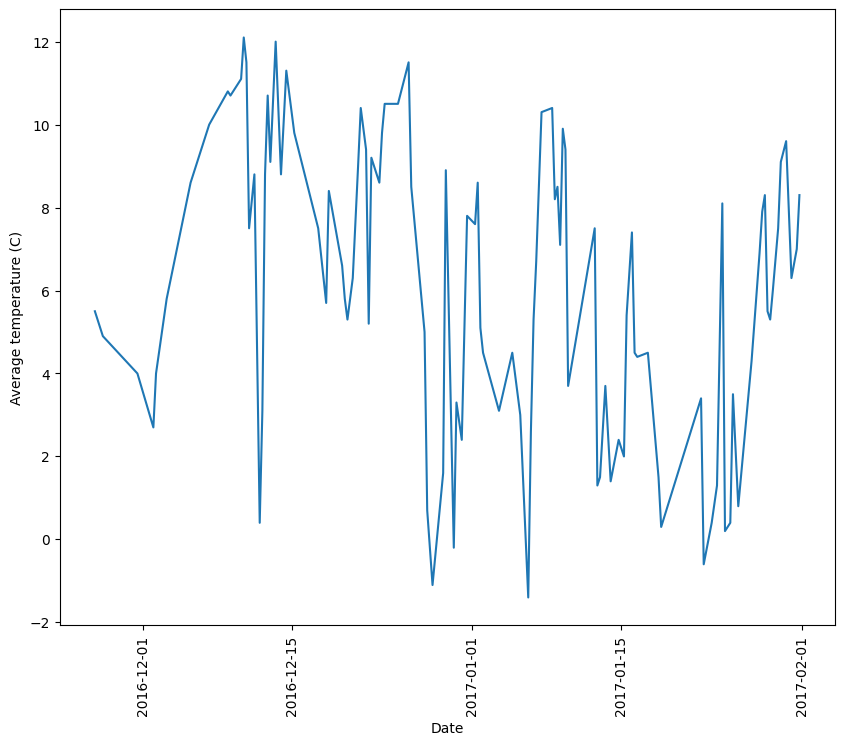

In [76]:
# Let's zoom in to 2014-2017
df_chunk = df.loc['2014-12':'2017-01']  # since the date is an index, we can use it to filter our data

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['temp'])
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('Average temperature (C)')

In [77]:
print(df_chunk.reindex(pd.date_range('2014-12', '2017-01')).isnull().all(1).sum()) # 33 days missing
df_chunk.reindex(pd.date_range('2014-12', '2017-01')).isnull().all(1)

752


2014-12-01     True
2014-12-02     True
2014-12-03     True
2014-12-04     True
2014-12-05     True
              ...  
2016-12-28     True
2016-12-29     True
2016-12-30     True
2016-12-31    False
2017-01-01     True
Freq: D, Length: 763, dtype: bool

In [78]:
df[df.index.duplicated(keep=False)].head(20)

temp   dew  humidity  precip  precipprob preciptype  \
datetime                                                                   
2023-10-29 01:00:00  11.4  10.5     93.87   0.678       100.0       rain   
2023-10-29 01:00:00  11.2  10.1     93.11   2.422       100.0       rain   

                     snow  snowdepth  windspeed  winddir  sealevelpressure  \
datetime                                                                     
2023-10-29 01:00:00   0.0        0.0       11.3    250.0             983.7   
2023-10-29 01:00:00   0.0        0.0       21.8    245.0             984.6   

                     cloudcover  solarradiation  solarenergy  uvindex  month  \
datetime                                                                       
2023-10-29 01:00:00        95.8             0.0          0.0      0.0     10   
2023-10-29 01:00:00        86.6             0.0          0.0      0.0     10   

                     year  week_of_year  
datetime                                 
2023-10-29 01:00:00  2023            43  
2023-10-29 01:00:00  2023            43

In [79]:
# Let's keep the first one only - in practice this would require more careful analysis!
df = df[~df.index.duplicated(keep='first')]
len(df)

8535

In [80]:
# Now we can reindex -- this is where the original error about duplicates was
df = df.reindex(pd.date_range(df.index[0], df.index[-1]))
print(len(df))

4960


In [81]:
# Now we should have missing values
print(df.isna().sum())

temp                4191
dew                 4191
humidity            4191
precip              4191
precipprob          4191
preciptype          4191
snow                4191
snowdepth           4191
windspeed           4191
winddir             4191
sealevelpressure    4191
cloudcover          4191
solarradiation      4191
solarenergy         4191
uvindex             4191
month               4191
year                4191
week_of_year        4191
dtype: int64


In [91]:
df_chunk = df.loc['2017-12-15':'2018-01-15']  # since the date is an index, we can use it to filter our data

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['temp'])
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('temperature (C)')
# The missing values are clearly visible now!

In [92]:
df2 = df_chunk.copy()
df2 = df2.loc[:, 'temp'].to_frame()
df2

temp
2017-12-15 06:00:00   3.4
2017-12-16 06:00:00   NaN
2017-12-17 06:00:00   NaN
2017-12-18 06:00:00   NaN
2017-12-19 06:00:00   NaN
2017-12-20 06:00:00   6.7
2017-12-21 06:00:00   NaN
2017-12-22 06:00:00   9.1
2017-12-23 06:00:00   NaN
2017-12-24 06:00:00   8.4
2017-12-25 06:00:00   9.1
2017-12-26 06:00:00   NaN
2017-12-27 06:00:00   4.8
2017-12-28 06:00:00   NaN
2017-12-29 06:00:00   6.9
2017-12-30 06:00:00  11.7
2017-12-31 06:00:00  11.3
2018-01-01 06:00:00   7.5
2018-01-02 06:00:00   NaN
2018-01-03 06:00:00   7.1
2018-01-04 06:00:00   8.1
2018-01-05 06:00:00   NaN
2018-01-06 06:00:00   3.7
2018-01-07 06:00:00   NaN
2018-01-08 06:00:00   NaN
2018-01-09 06:00:00   NaN
2018-01-10 06:00:00   7.1
2018-01-11 06:00:00   2.4
2018-01-12 06:00:00   5.9
2018-01-13 06:00:00   NaN
2018-01-14 06:00:00   NaN
2018-01-15 06:00:00   8.0

In [93]:
#Forward Fill
df2['ffill'] = df2['temp'].ffill()
# Backward Fill
df2['bfill'] = df2['temp'].bfill()
# Mean Value Fill
df2['meanfill'] = df2['temp'].fillna(df['temp'].mean())  # Note that we're using the mean of df, not of df2
# Fill with 0s
df2['zerofill'] = df2['temp'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(df2.index, df2['ffill'], label='ffill', linestyle='--', color='red')
plt.plot(df2.index, df2['bfill'], label='bfill', linestyle='-.', color='green')
plt.plot(df2.index, df2['meanfill'], label='mean', linestyle=':', color='black')
plt.plot(df2.index, df2['zerofill'], linestyle='--', color='purple', label='zero')
plt.plot(df2.index, df2['temp'], color='blue', label='Original')
plt.legend()
plt.ylabel('Temperature')
plt.ylim(-1, 26)
_=plt.title('Forward, backward, zero, and mean value fill')

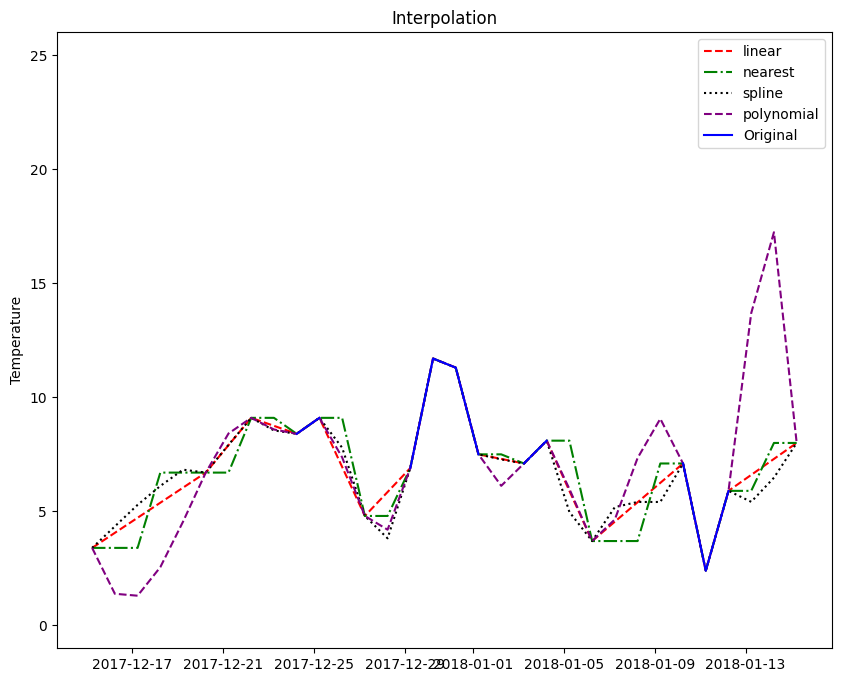

In [94]:
# Try different ways to fill the data - more advanced: interpolation

df2['linear_interp'] = df2['temp'].interpolate(method='linear')
df2['nearest_interp'] = df2['temp'].interpolate(method='nearest')
df2['spline_interp'] = df2['temp'].interpolate(method='spline', order=2)
df2['polynomial_interp'] = df2['temp'].interpolate(method="polynomial", order=3)

# Plot
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(df2.index, df2['linear_interp'], linestyle='--', color='red', label='linear')
plt.plot(df2.index, df2['nearest_interp'], linestyle='-.', color='green', label='nearest')
plt.plot(df2.index, df2['spline_interp'], linestyle=':', color='black', label='spline')
plt.plot(df2.index, df2['polynomial_interp'], linestyle='--', color='purple', label='polynomial')
plt.plot(df2.index, df2['temp'], label='Original', color='blue')

plt.legend()
plt.ylabel('Temperature')
plt.ylim(-1, 26)
_=plt.title('Interpolation')

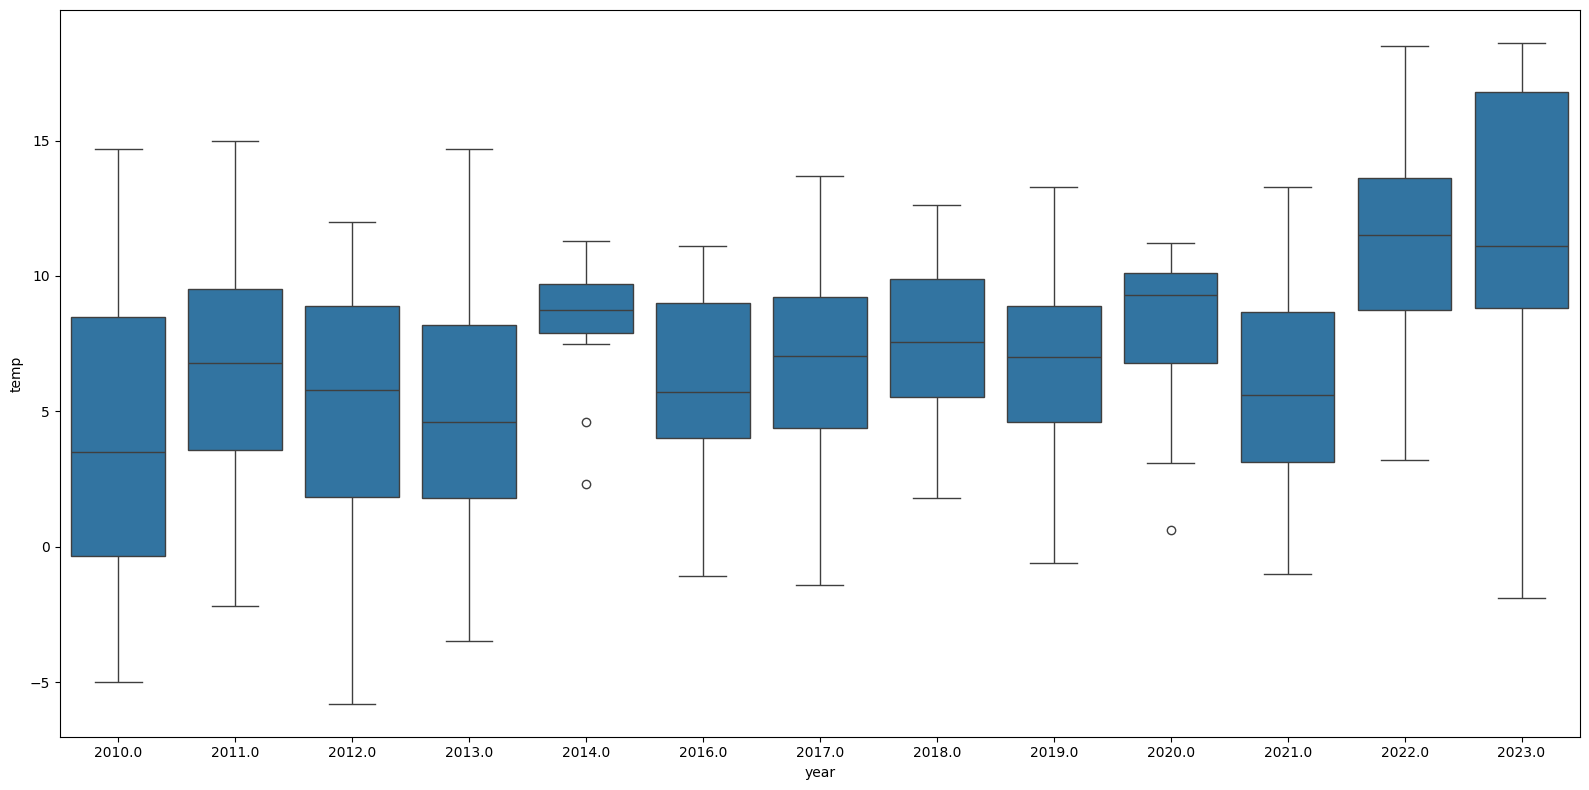

In [95]:
plt.figure(figsize=(16, 8))
_=sns.boxplot(x='year', y='temp', data=df)
_=plt.tight_layout()

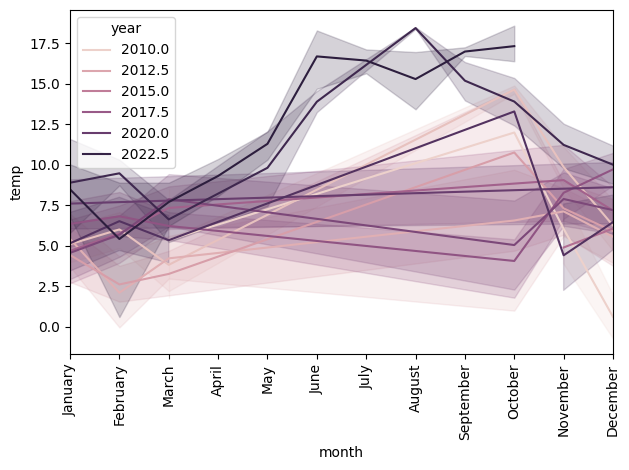

In [99]:
# Visualise trends across years
sns.lineplot(x='month', y='temp', data=df, hue='year')
_=plt.xticks(np.arange(1, 13), months_of_the_year, rotation=90)
_=plt.xlim(1, 12)  # limit x-axis
_=plt.tight_layout()

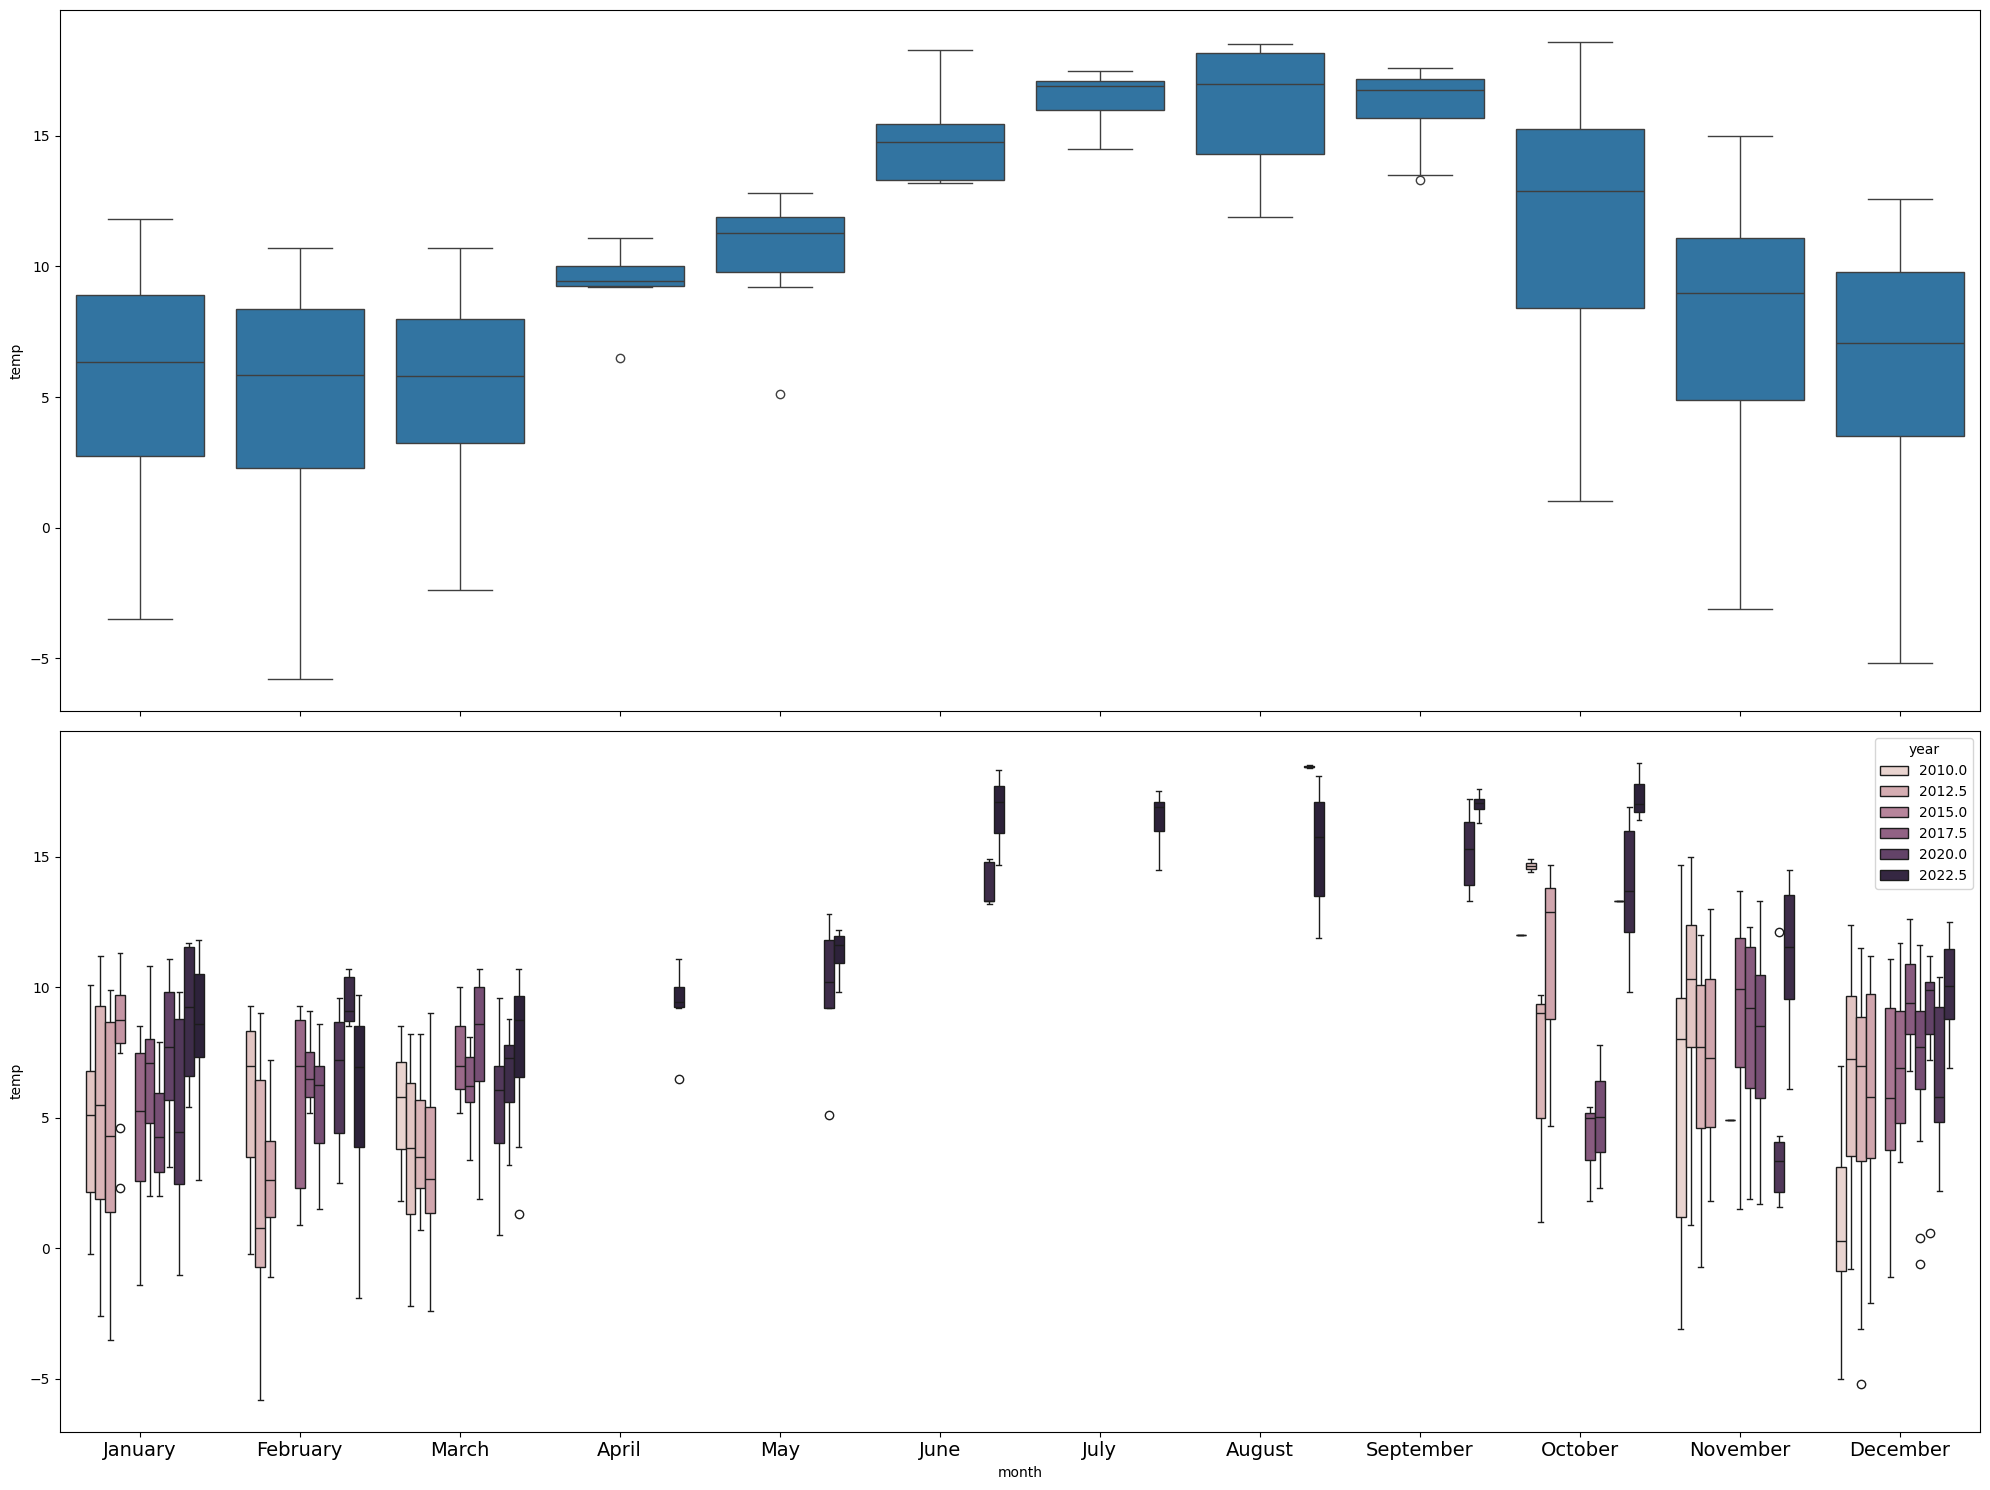

In [100]:
# Visualise trends across years
fix, ax = plt.subplots(2, 1, sharex=True, figsize=(20,15))
sns.boxplot(x='month', y='temp', data=df, ax=ax[0])  # top plot
sns.boxplot(x='month', y='temp', data=df, hue='year', ax=ax[1])  # bottom plot
ax[1].set_xticks(np.arange(0, 12), months_of_the_year, fontsize=14)
plt.tight_layout()

In [105]:
data_ds = df['temp'].resample('M').mean().ffill().to_frame()  # one value per month
data_ds

temp
2010-03-31   5.366667
2010-04-30   5.366667
2010-05-31   5.366667
2010-06-30   5.366667
2010-07-31   5.366667
...               ...
2023-06-30  16.700000
2023-07-31  16.442857
2023-08-31  15.300000
2023-09-30  17.000000
2023-10-31  17.333333

[164 rows x 1 columns]

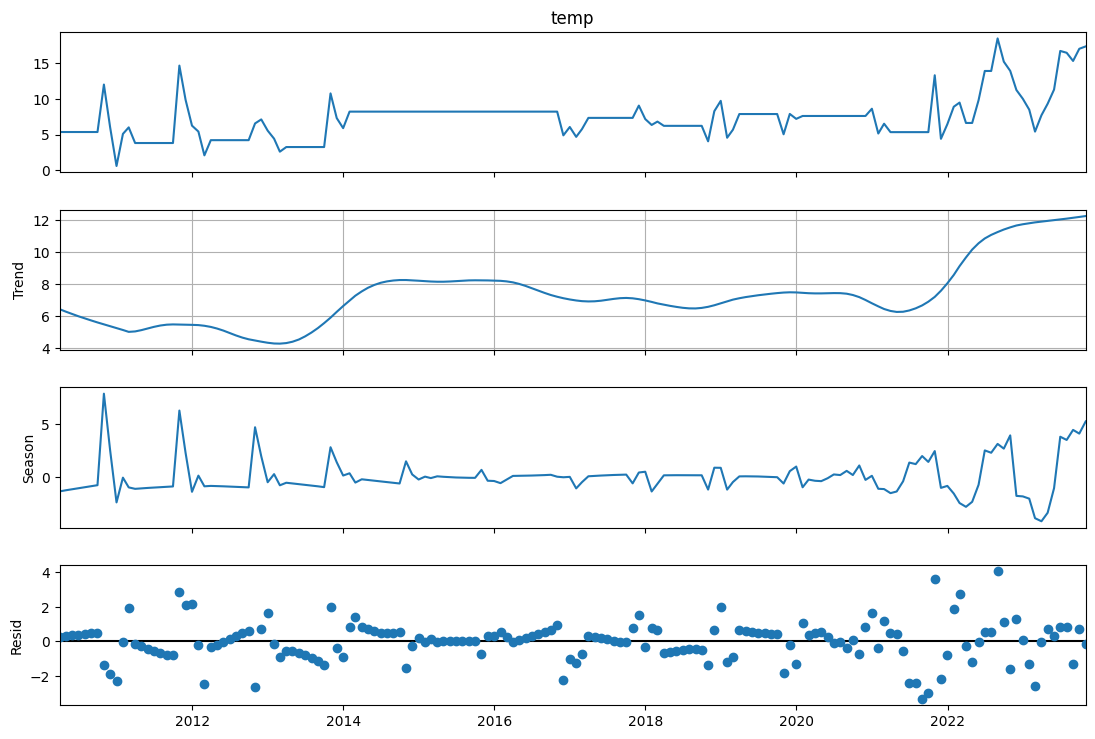

In [106]:
# Try decomposition on the resampled dataset
from statsmodels.tsa.seasonal import seasonal_decompose, STL
decomposition = STL(data_ds['temp']).fit()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.axes[1].grid()

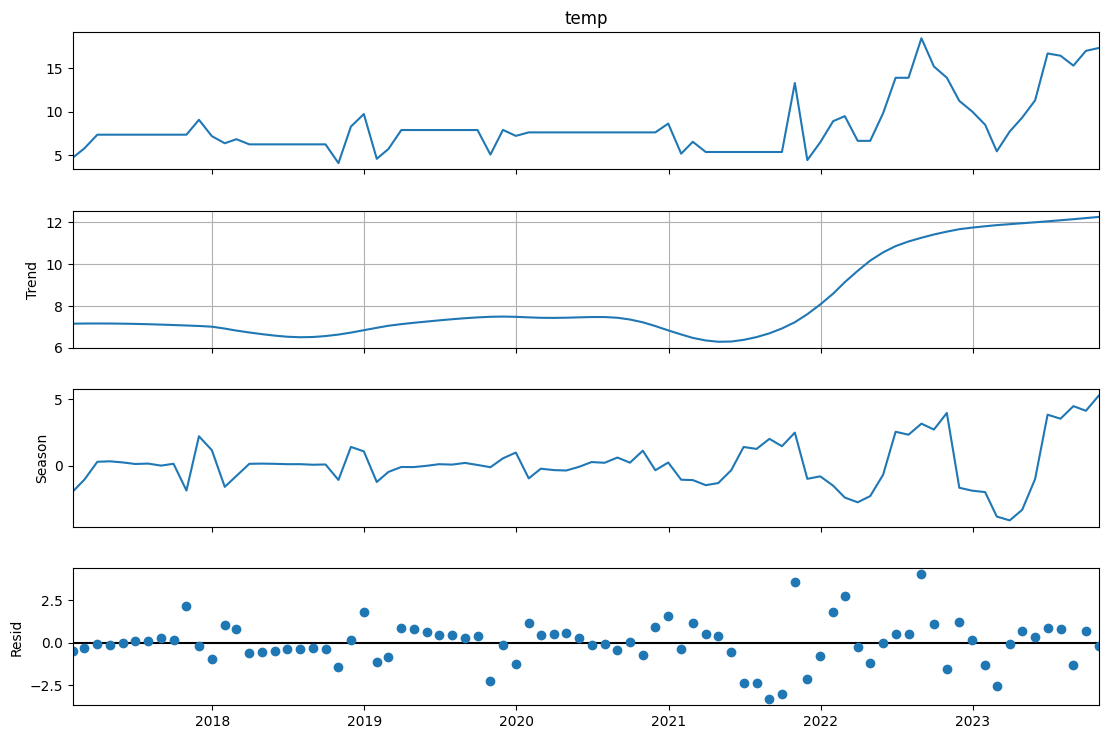

In [108]:
# Try decomposition on the resampled dataset, using only the full years
decomposition = STL(data_ds.loc['2017':'2024', 'temp']).fit()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.axes[1].grid()

In [110]:
# Statistical test for stationarity: Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(data_ds['temp'])
print('ADF Statistic %.2f:' % adf_result[0])
print('ADF p-value: %.4f:' % adf_result[1])
# p-value << 0.05 ==> timeseries does not have a unit root

ADF Statistic -0.13:
ADF p-value: 0.9465:


In [111]:
adf_result = adfuller(data_ds.loc['2017':'2024', 'temp'])  # ADF test on the full years only. Is there a trend?
print('ADF Statistic %.2f:' % adf_result[0])
print('ADF p-value: %.4f:' % adf_result[1])

ADF Statistic 0.10:
ADF p-value: 0.9659:


In [112]:
# Autocorrelation (can help us with modelling later)
fig, ax = plt.subplots(figsize=(16,8))
_=plot_acf(data_ds['temp'], lags=48, ax=ax)  # each lag is one month, so we're looking at 4 years worth of past data
_=plt.xlabel('Lags (months)')
_=plt.ylabel('Autocorrelation')

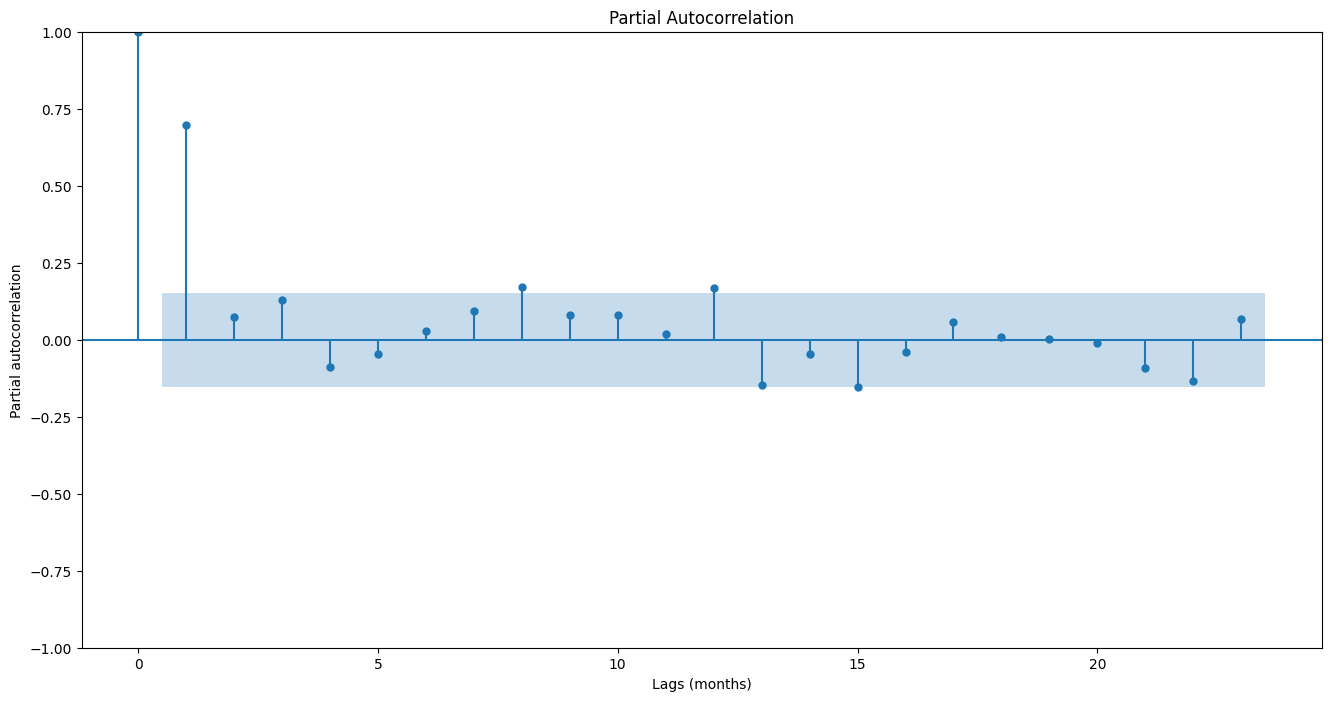

In [113]:
# Partial autocorrelation (can help us with modelling later)
fig, ax = plt.subplots(figsize=(16,8))
_=plot_pacf(data_ds['temp'], ax=ax)
_=plt.xlabel('Lags (months)')
_=plt.ylabel('Partial autocorrelation')

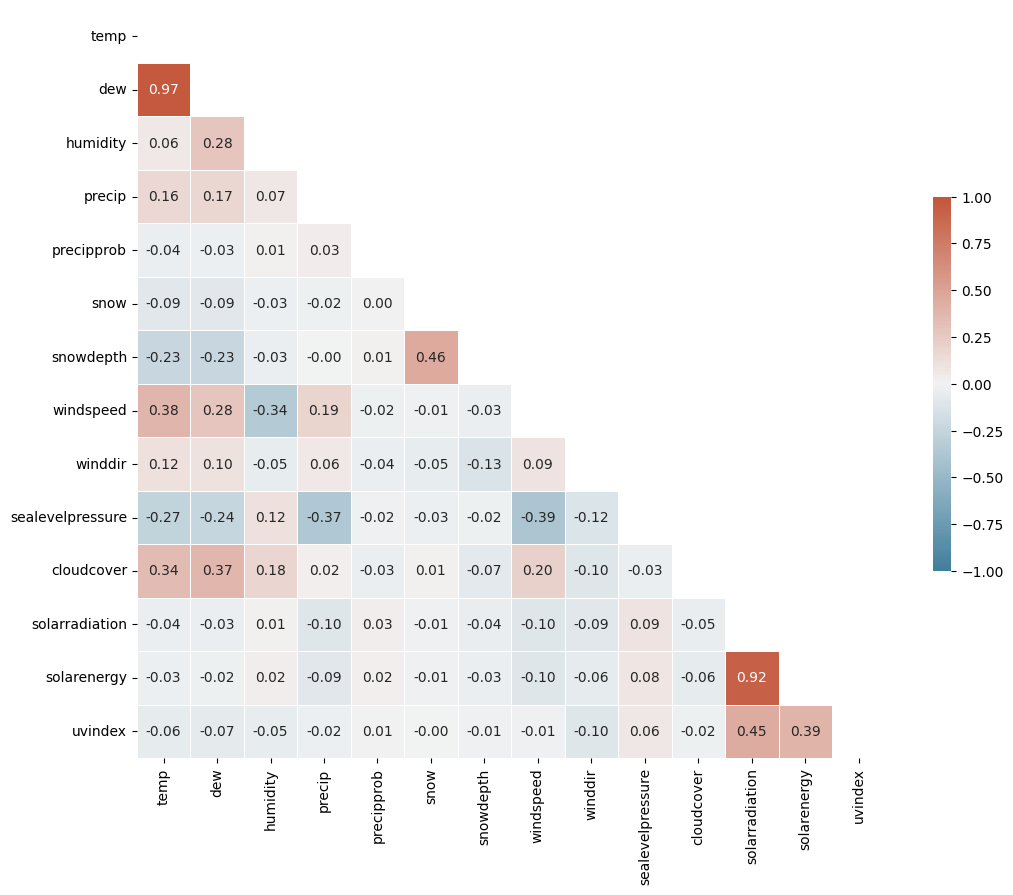

In [114]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.iloc[:, :-3].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.tight_layout()

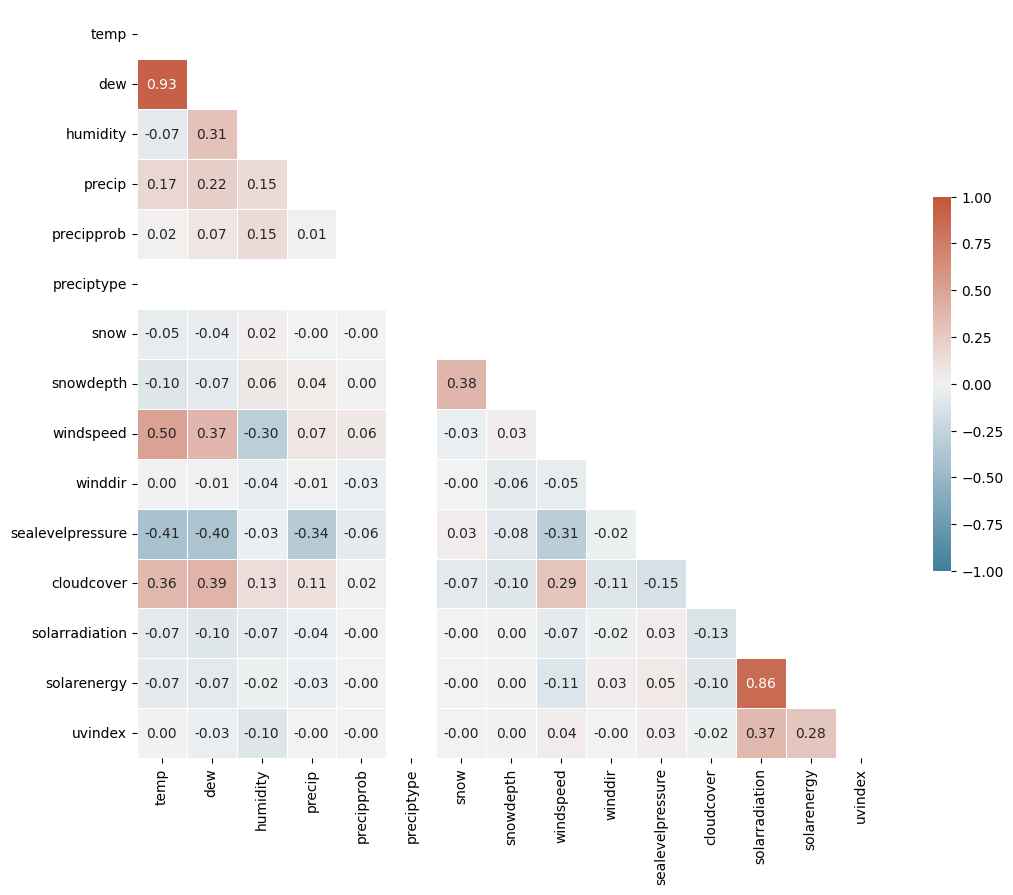

In [120]:
# Convert columns to numeric type if necessary
df_numeric = df.iloc[:, :-3].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_diff = df_numeric.diff().corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_diff, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_diff, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.tight_layout()
plt.show()


In [121]:
df2 = df.iloc[:, :-3].copy()
df2['temp_avg_lag3'] = df2['temp'].shift(-3)
df2.head()

temp  dew  humidity  precip  precipprob preciptype  snow  \
2010-03-22 06:00:00   5.8  5.7     99.37   0.223       100.0       rain   0.0   
2010-03-23 06:00:00   1.8  1.8     99.89   0.006       100.0  rain,snow   0.0   
2010-03-24 06:00:00   8.5  7.4     92.73   0.241       100.0       rain   0.0   
2010-03-25 06:00:00   NaN  NaN       NaN     NaN         NaN        NaN   NaN   
2010-03-26 06:00:00   NaN  NaN       NaN     NaN         NaN        NaN   NaN   

                     snowdepth  windspeed  winddir  sealevelpressure  \
2010-03-22 06:00:00        0.0        8.9    165.0            1019.5   
2010-03-23 06:00:00        0.0        2.0     81.0            1019.2   
2010-03-24 06:00:00        0.0       17.8    116.0            1006.1   
2010-03-25 06:00:00        NaN        NaN      NaN               NaN   
2010-03-26 06:00:00        NaN        NaN      NaN               NaN   

                     cloudcover  solarradiation  solarenergy  uvindex  \
2010-03-22 06:00:00        54.2            24.9          0.1      0.0   
2010-03-23 06:00:00        41.0            15.2          0.1      0.0   
2010-03-24 06:00:00        72.3            20.2          0.1      0.0   
2010-03-25 06:00:00         NaN             NaN          NaN      NaN   
2010-03-26 06:00:00         NaN             NaN          NaN      NaN   

                     temp_avg_lag3  
2010-03-22 06:00:00            NaN  
2010-03-23 06:00:00            NaN  
2010-03-24 06:00:00            NaN  
2010-03-25 06:00:00            NaN  
2010-03-26 06:00:00            NaN

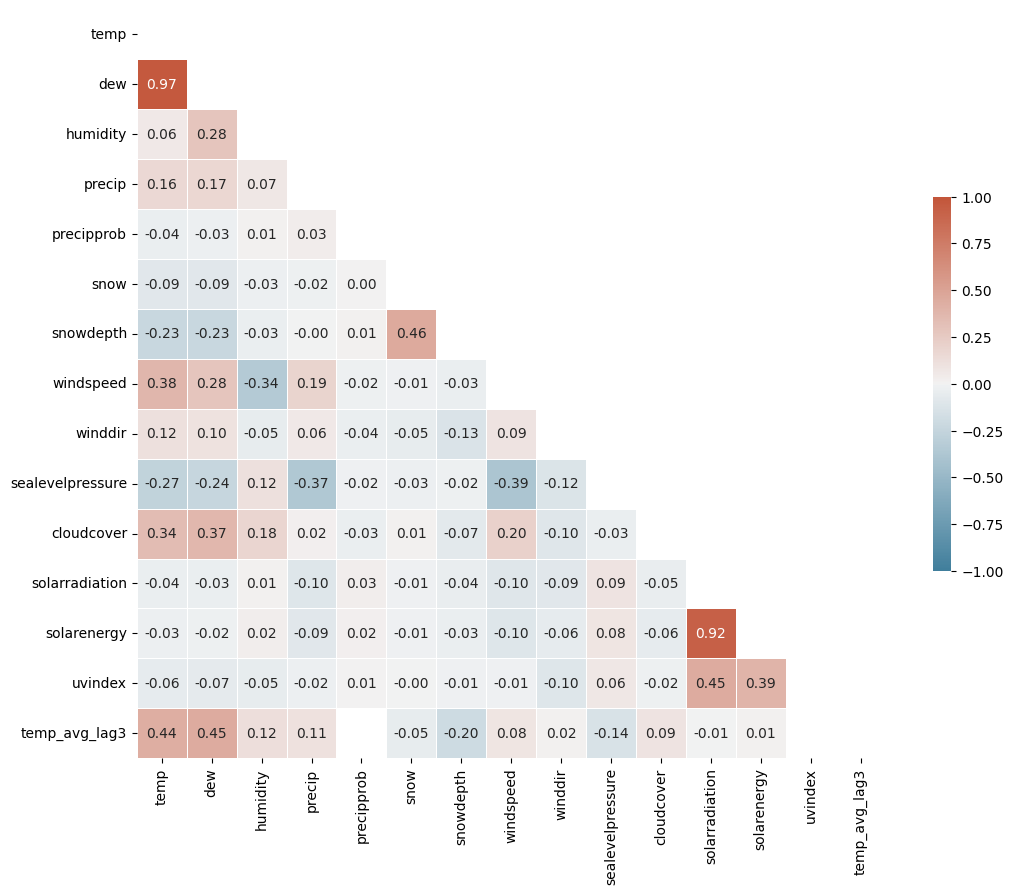

In [122]:
# Let's see what happens if we do the differential operation again.
df2 = df.iloc[:, :-3].copy()
df2['temp_avg_lag3'] = df2['temp'].shift(-3)
corr2 = df2.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.tight_layout()

#Colchester Data Visualization

##Exploratory Data Analysis

In [138]:

# Specify the folder directory where the dataset is located.
df_path = GOOGLE_DRIVE_PATH

#list of all files in the path
file_list = [file for file in os.listdir(GOOGLE_DRIVE_PATH) if file.endswith('.csv')]

brighton_df = []

# Iterate over each CSV file
for file_ in file_list:
    # Construct the full path to the CSV file
    file_path = os.path.join(df_path, file_)

    # Check for file has an index column named '0'
    index_column = pd.read_csv(file_path, nrows=1).columns[0] == '0'

    # Change header value based on the  value of the column
    header = 1 if index_column else "infer"

    current_dataframe = pd.read_csv(file_path, header=header)

    # If the file name contains "Colchester", add its DataFrame to the list
    if file_.startswith('colchester'):
        brighton_df.append(current_dataframe)

# Concantenate all the datasets into one
f_colchester_df = pd.concat(brighton_df, ignore_index=True)

In [139]:
#information about the DataFrame
print(f_colchester_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188024 entries, 0 to 188023
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          188024 non-null  object 
 1   temp              187606 non-null  float64
 2   dew               187600 non-null  float64
 3   humidity          187602 non-null  float64
 4   precip            187437 non-null  float64
 5   precipprob        187590 non-null  float64
 6   preciptype        19448 non-null   object 
 7   snow              186478 non-null  float64
 8   snowdepth         186429 non-null  float64
 9   windspeed         187627 non-null  float64
 10  winddir           187595 non-null  float64
 11  sealevelpressure  180462 non-null  float64
 12  cloudcover        184405 non-null  float64
 13  solarradiation    94894 non-null   float64
 14  uvindex           94897 non-null   float64
 15  solarenergy       94908 non-null   float64
dtypes: float64(14), obje

In [140]:
# Print dimensions of the dataset
print("Dataset dimensions:", f_colchester_df.shape)

Dataset dimensions: (188024, 16)


In [141]:
# Print first 2 rows of the dataset
print("First few rows of the dataset:")
print(f_colchester_df.head(2))

First few rows of the dataset:
              datetime  temp  dew  humidity  precip  precipprob preciptype  \
0  2000-01-01T00:00:00   5.9  5.7     98.63     0.0         0.0        NaN   
1  2000-01-01T01:00:00   6.4  5.8     96.12     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   NaN        NaN        9.4    210.0            1020.6         NaN   
1   NaN        NaN       15.1    233.0            1020.4       100.0   

   solarradiation  uvindex  solarenergy  
0             NaN      NaN          NaN  
1             NaN      NaN          NaN  


In [142]:
# Summary
print("Summary:")
print(f_colchester_df.describe())

Summary:
                temp            dew       humidity         precip  \
count  187606.000000  187600.000000  187602.000000  187437.000000   
mean       10.503048       7.190720      81.596979       0.067773   
std         6.004301       4.956358      14.085087       0.623144   
min        -9.600000     -10.800000      22.430000       0.000000   
25%         6.100000       3.600000      73.490000       0.000000   
50%        10.300000       7.400000      85.480000       0.000000   
75%        14.700000      10.900000      92.680000       0.000000   
max        35.000000      21.500000     100.000000      84.324000   

          precipprob           snow      snowdepth      windspeed  \
count  187590.000000  186478.000000  186429.000000  187627.000000   
mean       10.276578       0.001008       0.062193      15.998126   
std        30.357300       0.043173       0.602604       7.916611   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000    

In [143]:
# Counting for missing values
print("Missing values:")
print(f_colchester_df.isnull().sum())

Missing values:
datetime                 0
temp                   418
dew                    424
humidity               422
precip                 587
precipprob             434
preciptype          168576
snow                  1546
snowdepth             1595
windspeed              397
winddir                429
sealevelpressure      7562
cloudcover            3619
solarradiation       93130
uvindex              93127
solarenergy          93116
dtype: int64


In [144]:
# Info about  categorical variables
print("Categories & frequencies for categorical variables:")
for col in f_colchester_df.select_dtypes(include='object').columns:
    print(f_colchester_df[col].value_counts())

Categories & frequencies for categorical variables:
2008-10-26T01:00:00    2
2000-11-16T18:00:00    2
2000-11-16T11:00:00    2
2000-11-16T12:00:00    2
2000-11-16T13:00:00    2
                      ..
2007-05-16T01:00:00    1
2007-05-16T02:00:00    1
2007-05-16T03:00:00    1
2007-05-16T04:00:00    1
2023-10-07T23:00:00    1
Name: datetime, Length: 187979, dtype: int64
rain         18543
rain,snow      851
snow            54
Name: preciptype, dtype: int64


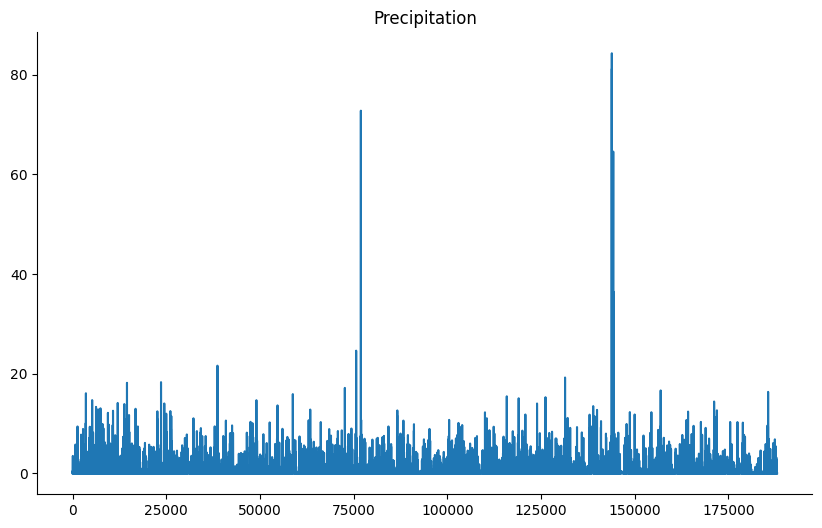

In [145]:
# @title Precipitation

from matplotlib import pyplot as plt
f_colchester_df['precip'].plot(kind='line', figsize=(10, 6), title='Precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

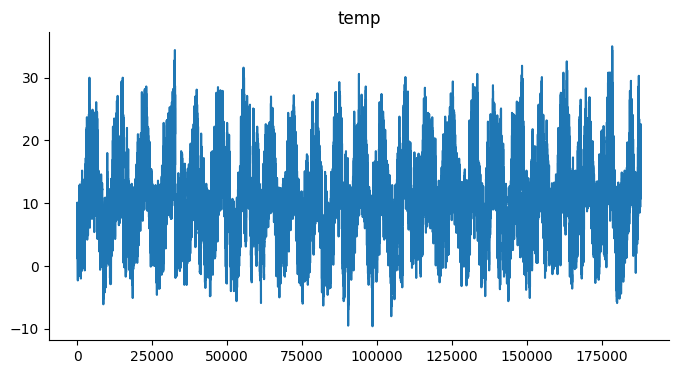

In [146]:
# @title Temperature

from matplotlib import pyplot as plt
f_colchester_df['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

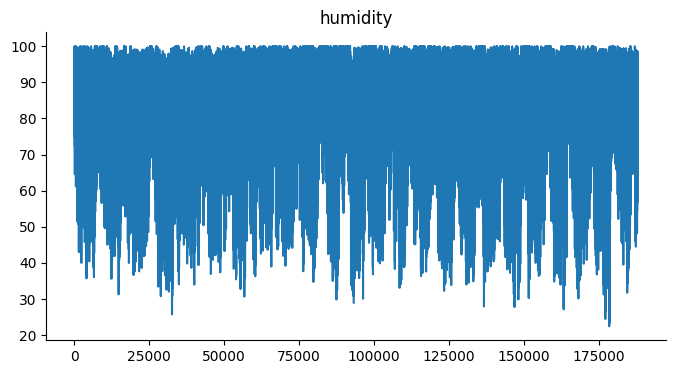

In [147]:
# @title Humidity

from matplotlib import pyplot as plt
f_colchester_df['humidity'].plot(kind='line', figsize=(8, 4), title='humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [148]:
# @title DateTime VS Precipitation

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('rocket'))
  xs = series['datetime']
  ys = series['precip']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f_colchester_df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('preciptype')):
  _plot_series(series, series_name, i)
  fig.legend(title='preciptype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('Precipitation')

In [179]:
# @title Time VS Dew

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('flare'))
  xs = series['datetime']
  ys = series['dew']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f_colchester_df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('preciptype')):
  _plot_series(series, series_name, i)
  fig.legend(title='preciptype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Dew')

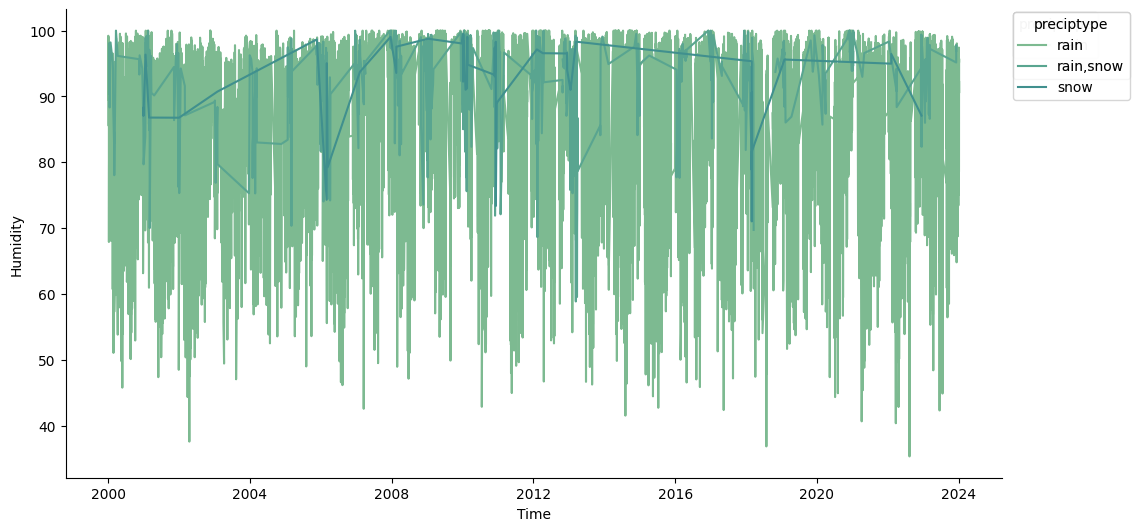

In [180]:
# @title Time VS Humidity

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('crest'))
  xs = series['datetime']
  ys = series['humidity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f_colchester_df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('preciptype')):
  _plot_series(series, series_name, i)
  fig.legend(title='preciptype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Humidity')

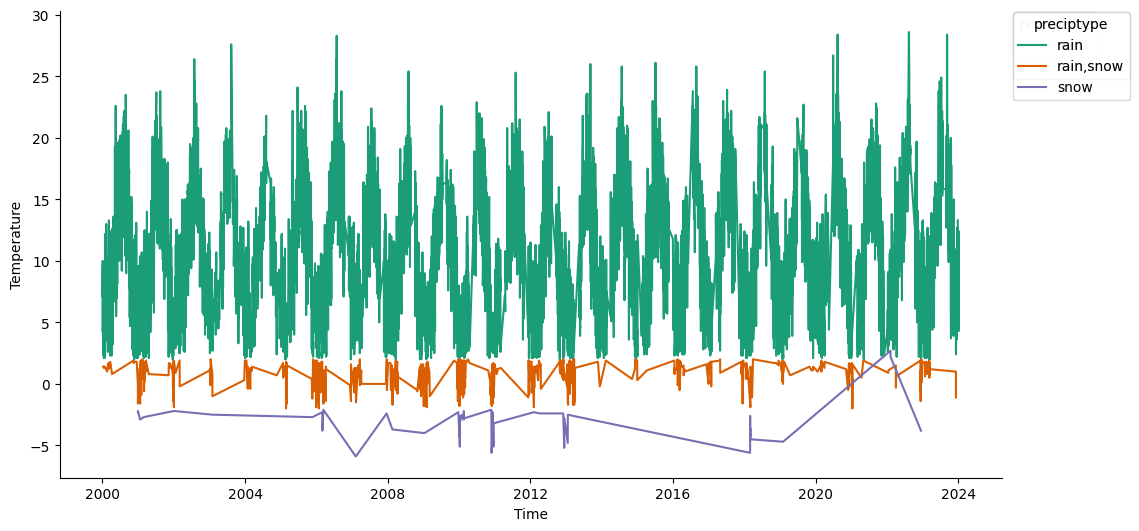

In [181]:
# @title Time vs Temperature

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['temp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f_colchester_df.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('preciptype')):
  _plot_series(series, series_name, i)
  fig.legend(title='preciptype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Temperature')

<Axes: xlabel='precip', ylabel='precipprob'>

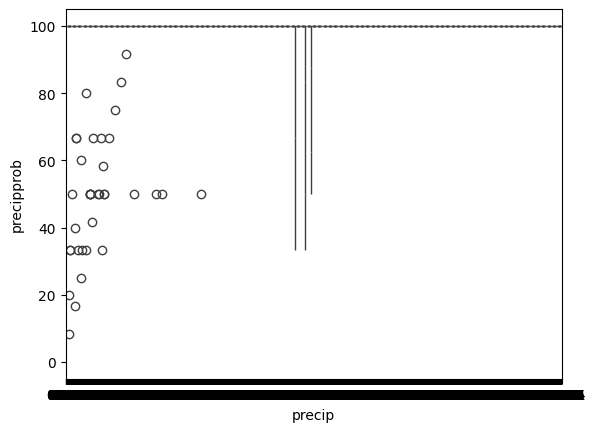

In [182]:
# @title Precipitaion VS Precipitation Probability

from matplotlib import pyplot as plt
sns.boxplot(x=f_colchester_df['precip'], y=f_colchester_df['precipprob'])

In [183]:
# @title Precipitaion VS Precipitation Probability
from matplotlib import pyplot as plt
f_colchester_df.plot(kind='scatter', x='precip', y='precipprob', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

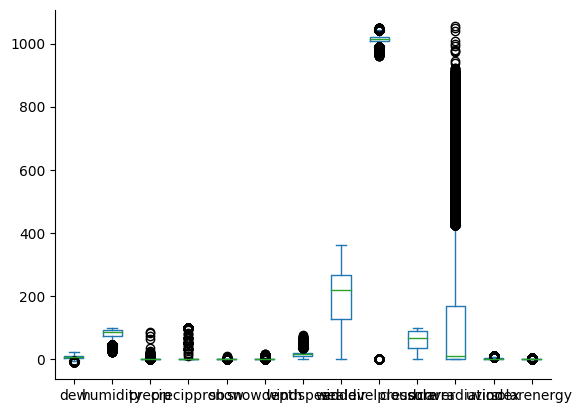

In [184]:
# @title Temperature vs Dew

from matplotlib import pyplot as plt
f_colchester_df.plot(kind='box', x='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [185]:
# @title Dew VS Humidity

from matplotlib import pyplot as plt
f_colchester_df.plot(kind='box', x='dew', y='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

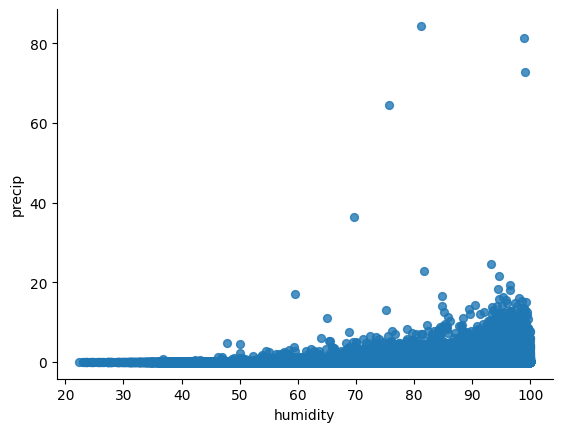

In [186]:
# @title Humidity VS Precipitation

from matplotlib import pyplot as plt
f_colchester_df.plot(kind='scatter', x='humidity', y='precip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Exploring Important Columns

In [187]:
# @title Precipitation Type

from matplotlib import pyplot as plt
import seaborn as sns
f_colchester_df.groupby('preciptype').size().plot(kind='barh', color=sns.palettes.mpl_palette('cubehelix'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [192]:
# @title Temperature

from matplotlib import pyplot as plt
f_colchester_df['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [193]:
# @title Dew

from matplotlib import pyplot as plt
f_colchester_df['dew'].plot(kind='hist', bins=20, title='dew')
plt.gca().spines[['top', 'right',]].set_visible(False)

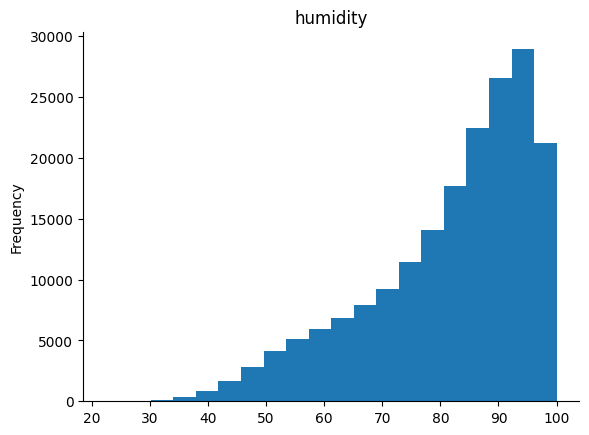

In [194]:
# @title Humidity

from matplotlib import pyplot as plt
f_colchester_df['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

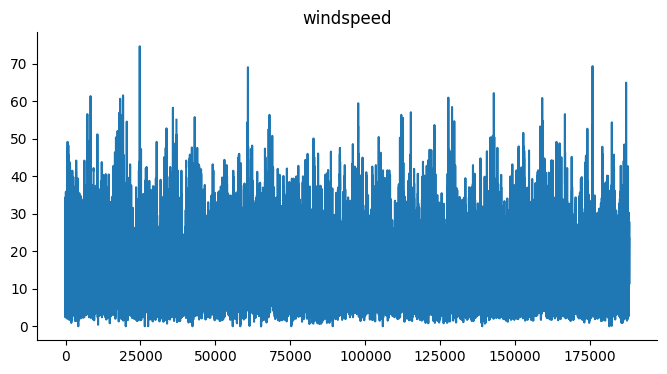

In [195]:
# @title Windspeed
from matplotlib import pyplot as plt
f_colchester_df['windspeed'].plot(kind='line', figsize=(8, 4), title='windspeed')
plt.gca().spines[['top', 'right']].set_visible(False)

## Time Series Analysis

In [127]:
months_of_the_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [149]:
f_colchester_df.columns

Index(['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex',
       'solarenergy'],
      dtype='object')

In [150]:
# Date will be our index. Let's convert it to a datetime type
f_colchester_df['datetime'] = pd.to_datetime(f_colchester_df['datetime'], dayfirst=True)
f_colchester_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188024 entries, 0 to 188023
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          188024 non-null  datetime64[ns]
 1   temp              187606 non-null  float64       
 2   dew               187600 non-null  float64       
 3   humidity          187602 non-null  float64       
 4   precip            187437 non-null  float64       
 5   precipprob        187590 non-null  float64       
 6   preciptype        19448 non-null   object        
 7   snow              186478 non-null  float64       
 8   snowdepth         186429 non-null  float64       
 9   windspeed         187627 non-null  float64       
 10  winddir           187595 non-null  float64       
 11  sealevelpressure  180462 non-null  float64       
 12  cloudcover        184405 non-null  float64       
 13  solarradiation    94894 non-null   float64       
 14  uvin

In [151]:
df_c = f_colchester_df.copy()
df_c['month'] = df_c['datetime'].dt.month
df_c['year'] = df_c['datetime'].dt.year
df_c['week_of_year'] = df_c['datetime'].dt.isocalendar().week
df_c

datetime  temp   dew  humidity  precip  precipprob  \
0      2000-01-01 00:00:00   5.9   5.7     98.63     0.0         0.0   
1      2000-01-01 01:00:00   6.4   5.8     96.12     0.0         0.0   
2      2000-01-01 02:00:00   6.6   6.4     98.31     0.0         0.0   
3      2000-01-01 03:00:00   7.2   6.5     95.92     0.0         0.0   
4      2000-01-01 04:00:00   7.2   6.6     96.38     0.0         0.0   
...                    ...   ...   ...       ...     ...         ...   
188019 2023-10-07 19:00:00  19.8  14.3     70.36     0.0         0.0   
188020 2023-10-07 20:00:00  19.1  13.8     71.03     0.0         0.0   
188021 2023-10-07 21:00:00  18.2  13.0     71.86     0.0         0.0   
188022 2023-10-07 22:00:00  17.4  12.9     75.17     0.0         0.0   
188023 2023-10-07 23:00:00  16.4  12.5     77.64     0.0         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
0             NaN   NaN        NaN        9.4    210.0            1020.6   
1             NaN   NaN        NaN       15.1    233.0            1020.4   
2             NaN   NaN        NaN       13.9    238.0            1020.5   
3             NaN   NaN        NaN       14.1    232.0            1020.5   
4             NaN   NaN        NaN       14.3    242.0            1020.4   
...           ...   ...        ...        ...      ...               ...   
188019        NaN   0.0        0.0       18.3    244.0            1021.5   
188020        NaN   0.0        0.0       19.5    249.0            1021.8   
188021        NaN   0.0        0.0       18.5    251.0            1022.4   
188022        NaN   0.0        0.0       14.4    261.0            1022.7   
188023        NaN   0.0        0.0       11.3    265.0            1023.2   

        cloudcover  solarradiation  uvindex  solarenergy  month  year  \
0              NaN             NaN      NaN          NaN      1  2000   
1            100.0             NaN      NaN          NaN      1  2000   
2            100.0             NaN      NaN          NaN      1  2000   
3            100.0             NaN      NaN          NaN      1  2000   
4            100.0             NaN      NaN          NaN      1  2000   
...            ...             ...      ...          ...    ...   ...   
188019        40.4             0.0      0.0          0.0     10  2023   
188020        45.5             0.0      0.0          0.0     10  2023   
188021        11.5             0.0      0.0          0.0     10  2023   
188022         9.5             0.0      0.0          0.0     10  2023   
188023        28.2             0.0      0.0          0.0     10  2023   

        week_of_year  
0                 52  
1                 52  
2                 52  
3                 52  
4                 52  
...              ...  
188019            40  
188020            40  
188021            40  
188022            40  
188023            40  

[188024 rows x 19 columns]

In [152]:
# Let's make the date column the index of the dataframe for easier slicing
df_c.set_index('datetime', inplace=True) # note we can only run this once, as it will delete the 'date' column.
df_c.head()

temp  dew  humidity  precip  precipprob preciptype  snow  \
datetime                                                                        
2000-01-01 00:00:00   5.9  5.7     98.63     0.0         0.0        NaN   NaN   
2000-01-01 01:00:00   6.4  5.8     96.12     0.0         0.0        NaN   NaN   
2000-01-01 02:00:00   6.6  6.4     98.31     0.0         0.0        NaN   NaN   
2000-01-01 03:00:00   7.2  6.5     95.92     0.0         0.0        NaN   NaN   
2000-01-01 04:00:00   7.2  6.6     96.38     0.0         0.0        NaN   NaN   

                     snowdepth  windspeed  winddir  sealevelpressure  \
datetime                                                               
2000-01-01 00:00:00        NaN        9.4    210.0            1020.6   
2000-01-01 01:00:00        NaN       15.1    233.0            1020.4   
2000-01-01 02:00:00        NaN       13.9    238.0            1020.5   
2000-01-01 03:00:00        NaN       14.1    232.0            1020.5   
2000-01-01 04:00:00        NaN       14.3    242.0            1020.4   

                     cloudcover  solarradiation  uvindex  solarenergy  month  \
datetime                                                                       
2000-01-01 00:00:00         NaN             NaN      NaN          NaN      1   
2000-01-01 01:00:00       100.0             NaN      NaN          NaN      1   
2000-01-01 02:00:00       100.0             NaN      NaN          NaN      1   
2000-01-01 03:00:00       100.0             NaN      NaN          NaN      1   
2000-01-01 04:00:00       100.0             NaN      NaN          NaN      1   

                     year  week_of_year  
datetime                                 
2000-01-01 00:00:00  2000            52  
2000-01-01 01:00:00  2000            52  
2000-01-01 02:00:00  2000            52  
2000-01-01 03:00:00  2000            52  
2000-01-01 04:00:00  2000            52

In [153]:
print(df_c.isna().any())
df_c=df_c.dropna()
print(df_c.isna().any())

temp                 True
dew                  True
humidity             True
precip               True
precipprob           True
preciptype           True
snow                 True
snowdepth            True
windspeed            True
winddir              True
sealevelpressure     True
cloudcover           True
solarradiation       True
uvindex              True
solarenergy          True
month               False
year                False
week_of_year        False
dtype: bool
temp                False
dew                 False
humidity            False
precip              False
precipprob          False
preciptype          False
snow                False
snowdepth           False
windspeed           False
winddir             False
sealevelpressure    False
cloudcover          False
solarradiation      False
uvindex             False
solarenergy         False
month               False
year                False
week_of_year        False
dtype: bool


Text(0, 0.5, 'temperature (C)')

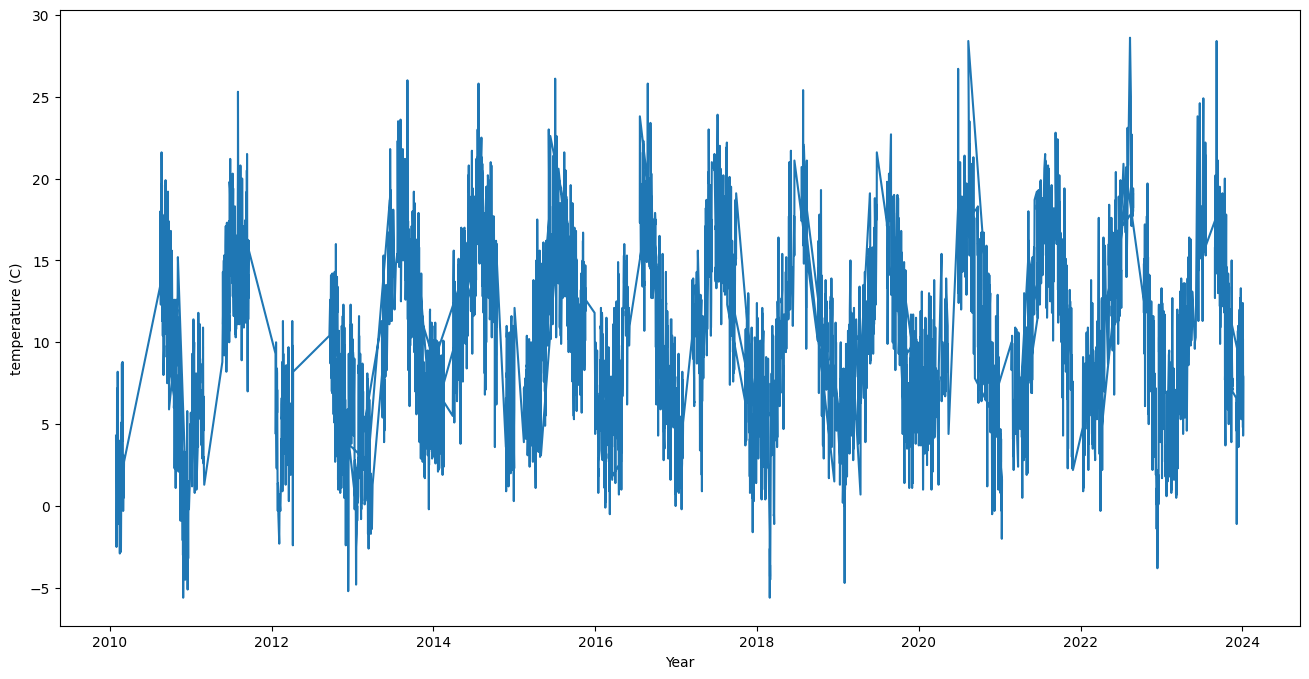

In [154]:
plt.figure(figsize=(16,8))
plt.plot(df_c.index, df_c['temp'])
plt.xlabel('Year')
plt.ylabel('temperature (C)')

In [155]:
# Let's zoom in to 2014-2017
df_chunk = df_c.loc['2014-12':'2017-01']  # since the date is an index, we can use it to filter our data

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['temp'])
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('Average temperature (C)')

In [156]:
print(df_chunk.reindex(pd.date_range('2014-12', '2017-01')).isnull().all(1).sum())
df_chunk.reindex(pd.date_range('2014-12', '2017-01')).isnull().all(1)

652


2014-12-01    False
2014-12-02     True
2014-12-03    False
2014-12-04     True
2014-12-05    False
              ...  
2016-12-28     True
2016-12-29     True
2016-12-30     True
2016-12-31     True
2017-01-01     True
Freq: D, Length: 763, dtype: bool

In [157]:
df_c[df_c.index.duplicated(keep=False)].head(20)

temp   dew  humidity  precip  precipprob preciptype  \
datetime                                                                   
2013-10-27 01:00:00  14.3  12.2     87.17   0.210       100.0       rain   
2013-10-27 01:00:00  14.0  12.6     91.71   0.197       100.0       rain   
2023-10-29 01:00:00  12.2  11.4     94.57   6.905       100.0       rain   
2023-10-29 01:00:00  11.9  10.3     89.60   0.686       100.0       rain   

                     snow  snowdepth  windspeed  winddir  sealevelpressure  \
datetime                                                                     
2013-10-27 01:00:00   0.0        0.0       34.9    201.0             997.9   
2013-10-27 01:00:00   0.0        0.0       29.4    211.0             997.3   
2023-10-29 01:00:00   0.0        0.0       15.0    192.0             981.9   
2023-10-29 01:00:00   0.0        0.0       20.6    223.0             981.5   

                     cloudcover  solarradiation  uvindex  solarenergy  month  \
datetime                                                                       
2013-10-27 01:00:00        77.7             0.0      0.0          0.0     10   
2013-10-27 01:00:00        84.4             0.0      0.0          0.0     10   
2023-10-29 01:00:00        71.9             0.0      0.0          0.0     10   
2023-10-29 01:00:00        93.8             0.0      0.0          0.0     10   

                     year  week_of_year  
datetime                                 
2013-10-27 01:00:00  2013            43  
2013-10-27 01:00:00  2013            43  
2023-10-29 01:00:00  2023            43  
2023-10-29 01:00:00  2023            43

In [158]:
# Let's keep the first one only - in practice this would require more careful analysis!
df_c = df_c[~df_c.index.duplicated(keep='first')]
len(df_c)

11497

In [159]:
# Now we can reindex -- this is where the original error about duplicates was
df_c = df_c.reindex(pd.date_range(df_c.index[0], df_c.index[-1]))
print(len(df_c))

4996


In [160]:
# Now we should have missing values
print(df_c.isna().sum())

temp                4339
dew                 4339
humidity            4339
precip              4339
precipprob          4339
preciptype          4339
snow                4339
snowdepth           4339
windspeed           4339
winddir             4339
sealevelpressure    4339
cloudcover          4339
solarradiation      4339
uvindex             4339
solarenergy         4339
month               4339
year                4339
week_of_year        4339
dtype: int64


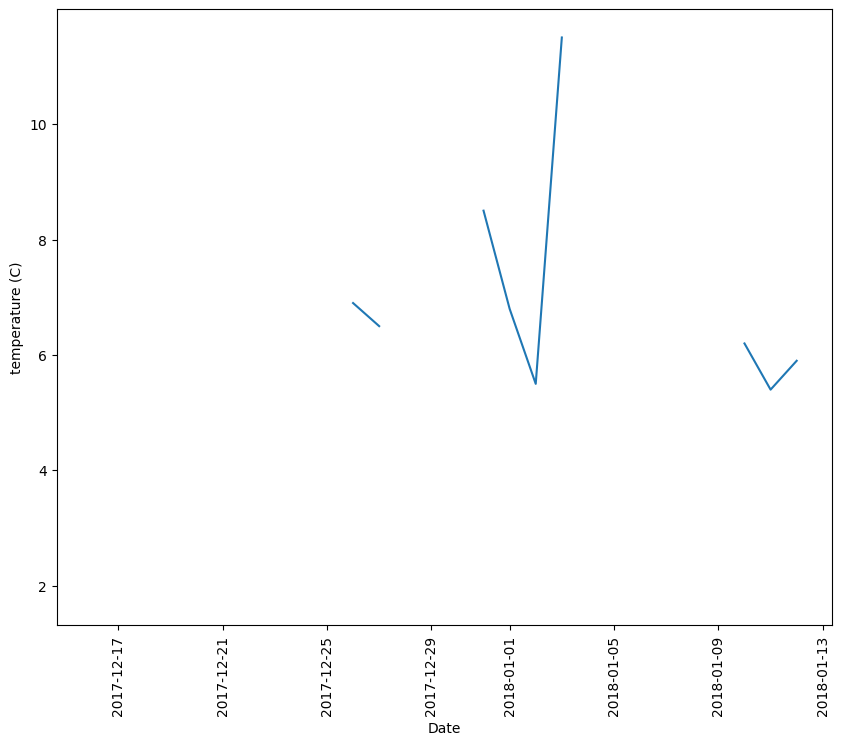

In [161]:
df_chunk = df_c.loc['2017-12-15':'2018-01-15']  # since the date is an index, we can use it to filter our data

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['temp'])
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('temperature (C)')
# The missing values are clearly visible now!

In [163]:
df2 = df_chunk.copy()
df2 = df2.loc[:, 'temp'].to_frame()
df2

temp
2017-12-15   NaN
2017-12-16   1.8
2017-12-17   NaN
2017-12-18   6.4
2017-12-19   NaN
2017-12-20   NaN
2017-12-21   9.6
2017-12-22   NaN
2017-12-23   NaN
2017-12-24   NaN
2017-12-25   NaN
2017-12-26   6.9
2017-12-27   6.5
2017-12-28   NaN
2017-12-29   NaN
2017-12-30   NaN
2017-12-31   8.5
2018-01-01   6.8
2018-01-02   5.5
2018-01-03  11.5
2018-01-04   NaN
2018-01-05   5.6
2018-01-06   NaN
2018-01-07   NaN
2018-01-08   NaN
2018-01-09   NaN
2018-01-10   6.2
2018-01-11   5.4
2018-01-12   5.9
2018-01-13   NaN
2018-01-14   NaN
2018-01-15   NaN

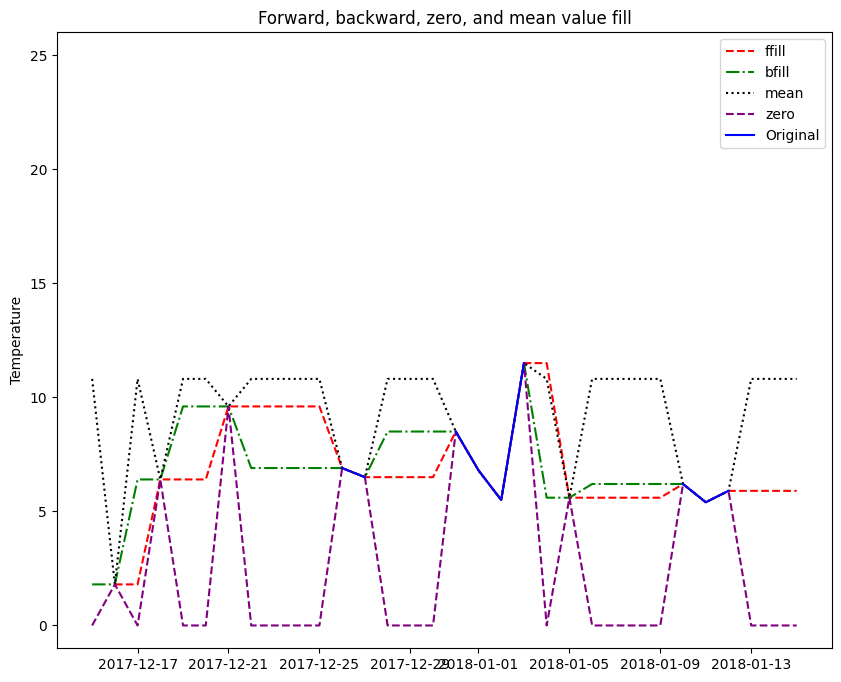

In [164]:
#Forward Fill
df2['ffill'] = df2['temp'].ffill()
# Backward Fill
df2['bfill'] = df2['temp'].bfill()
# Mean Value Fill
df2['meanfill'] = df2['temp'].fillna(df['temp'].mean())  # Note that we're using the mean of df, not of df2
# Fill with 0s
df2['zerofill'] = df2['temp'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(df2.index, df2['ffill'], label='ffill', linestyle='--', color='red')
plt.plot(df2.index, df2['bfill'], label='bfill', linestyle='-.', color='green')
plt.plot(df2.index, df2['meanfill'], label='mean', linestyle=':', color='black')
plt.plot(df2.index, df2['zerofill'], linestyle='--', color='purple', label='zero')
plt.plot(df2.index, df2['temp'], color='blue', label='Original')
plt.legend()
plt.ylabel('Temperature')
plt.ylim(-1, 26)
_=plt.title('Forward, backward, zero, and mean value fill')

In [165]:
# Try different ways to fill the data - more advanced: interpolation

df2['linear_interp'] = df2['temp'].interpolate(method='linear')
df2['nearest_interp'] = df2['temp'].interpolate(method='nearest')
df2['spline_interp'] = df2['temp'].interpolate(method='spline', order=2)
df2['polynomial_interp'] = df2['temp'].interpolate(method="polynomial", order=3)

# Plot
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(df2.index, df2['linear_interp'], linestyle='--', color='red', label='linear')
plt.plot(df2.index, df2['nearest_interp'], linestyle='-.', color='green', label='nearest')
plt.plot(df2.index, df2['spline_interp'], linestyle=':', color='black', label='spline')
plt.plot(df2.index, df2['polynomial_interp'], linestyle='--', color='purple', label='polynomial')
plt.plot(df2.index, df2['temp'], label='Original', color='blue')

plt.legend()
plt.ylabel('Temperature')
plt.ylim(-1, 26)
_=plt.title('Interpolation')

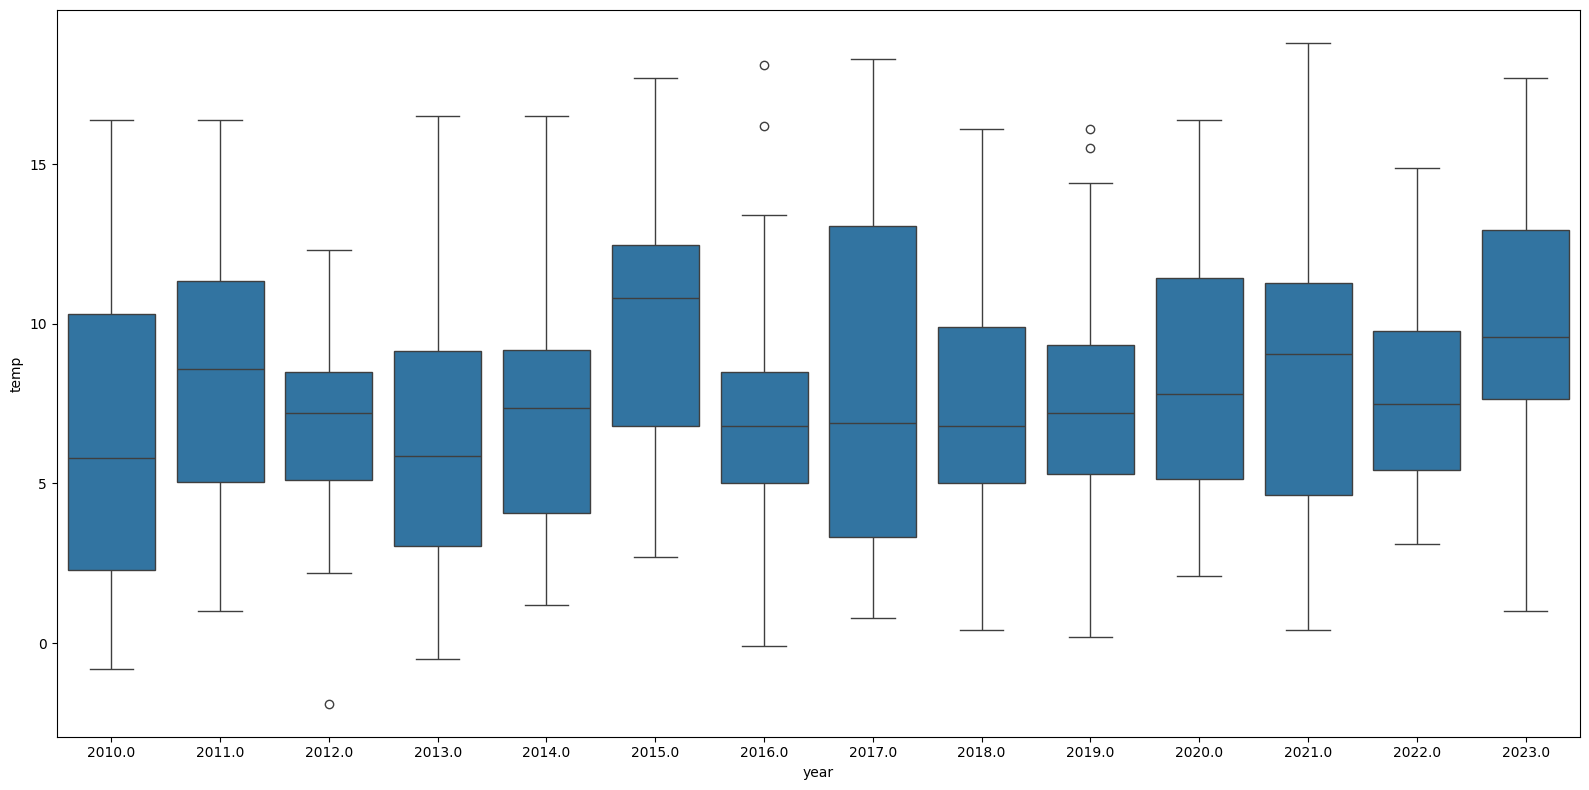

In [166]:
plt.figure(figsize=(16, 8))
_=sns.boxplot(x='year', y='temp', data=df_c)
_=plt.tight_layout()

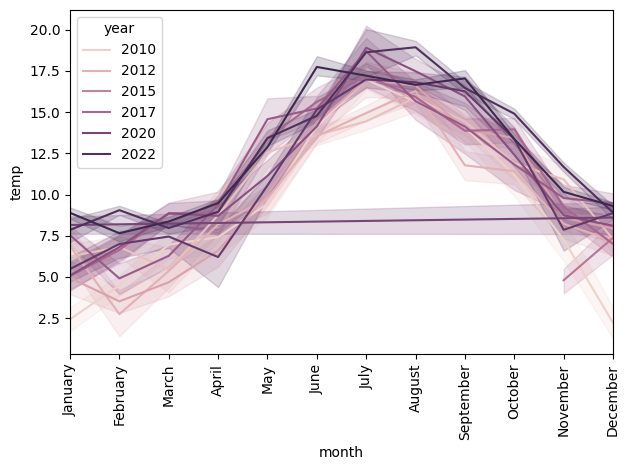

In [167]:
# Visualise trends across years
sns.lineplot(x='month', y='temp', data=df, hue='year')
_=plt.xticks(np.arange(1, 13), months_of_the_year, rotation=90)
_=plt.xlim(1, 12)  # limit x-axis
_=plt.tight_layout()

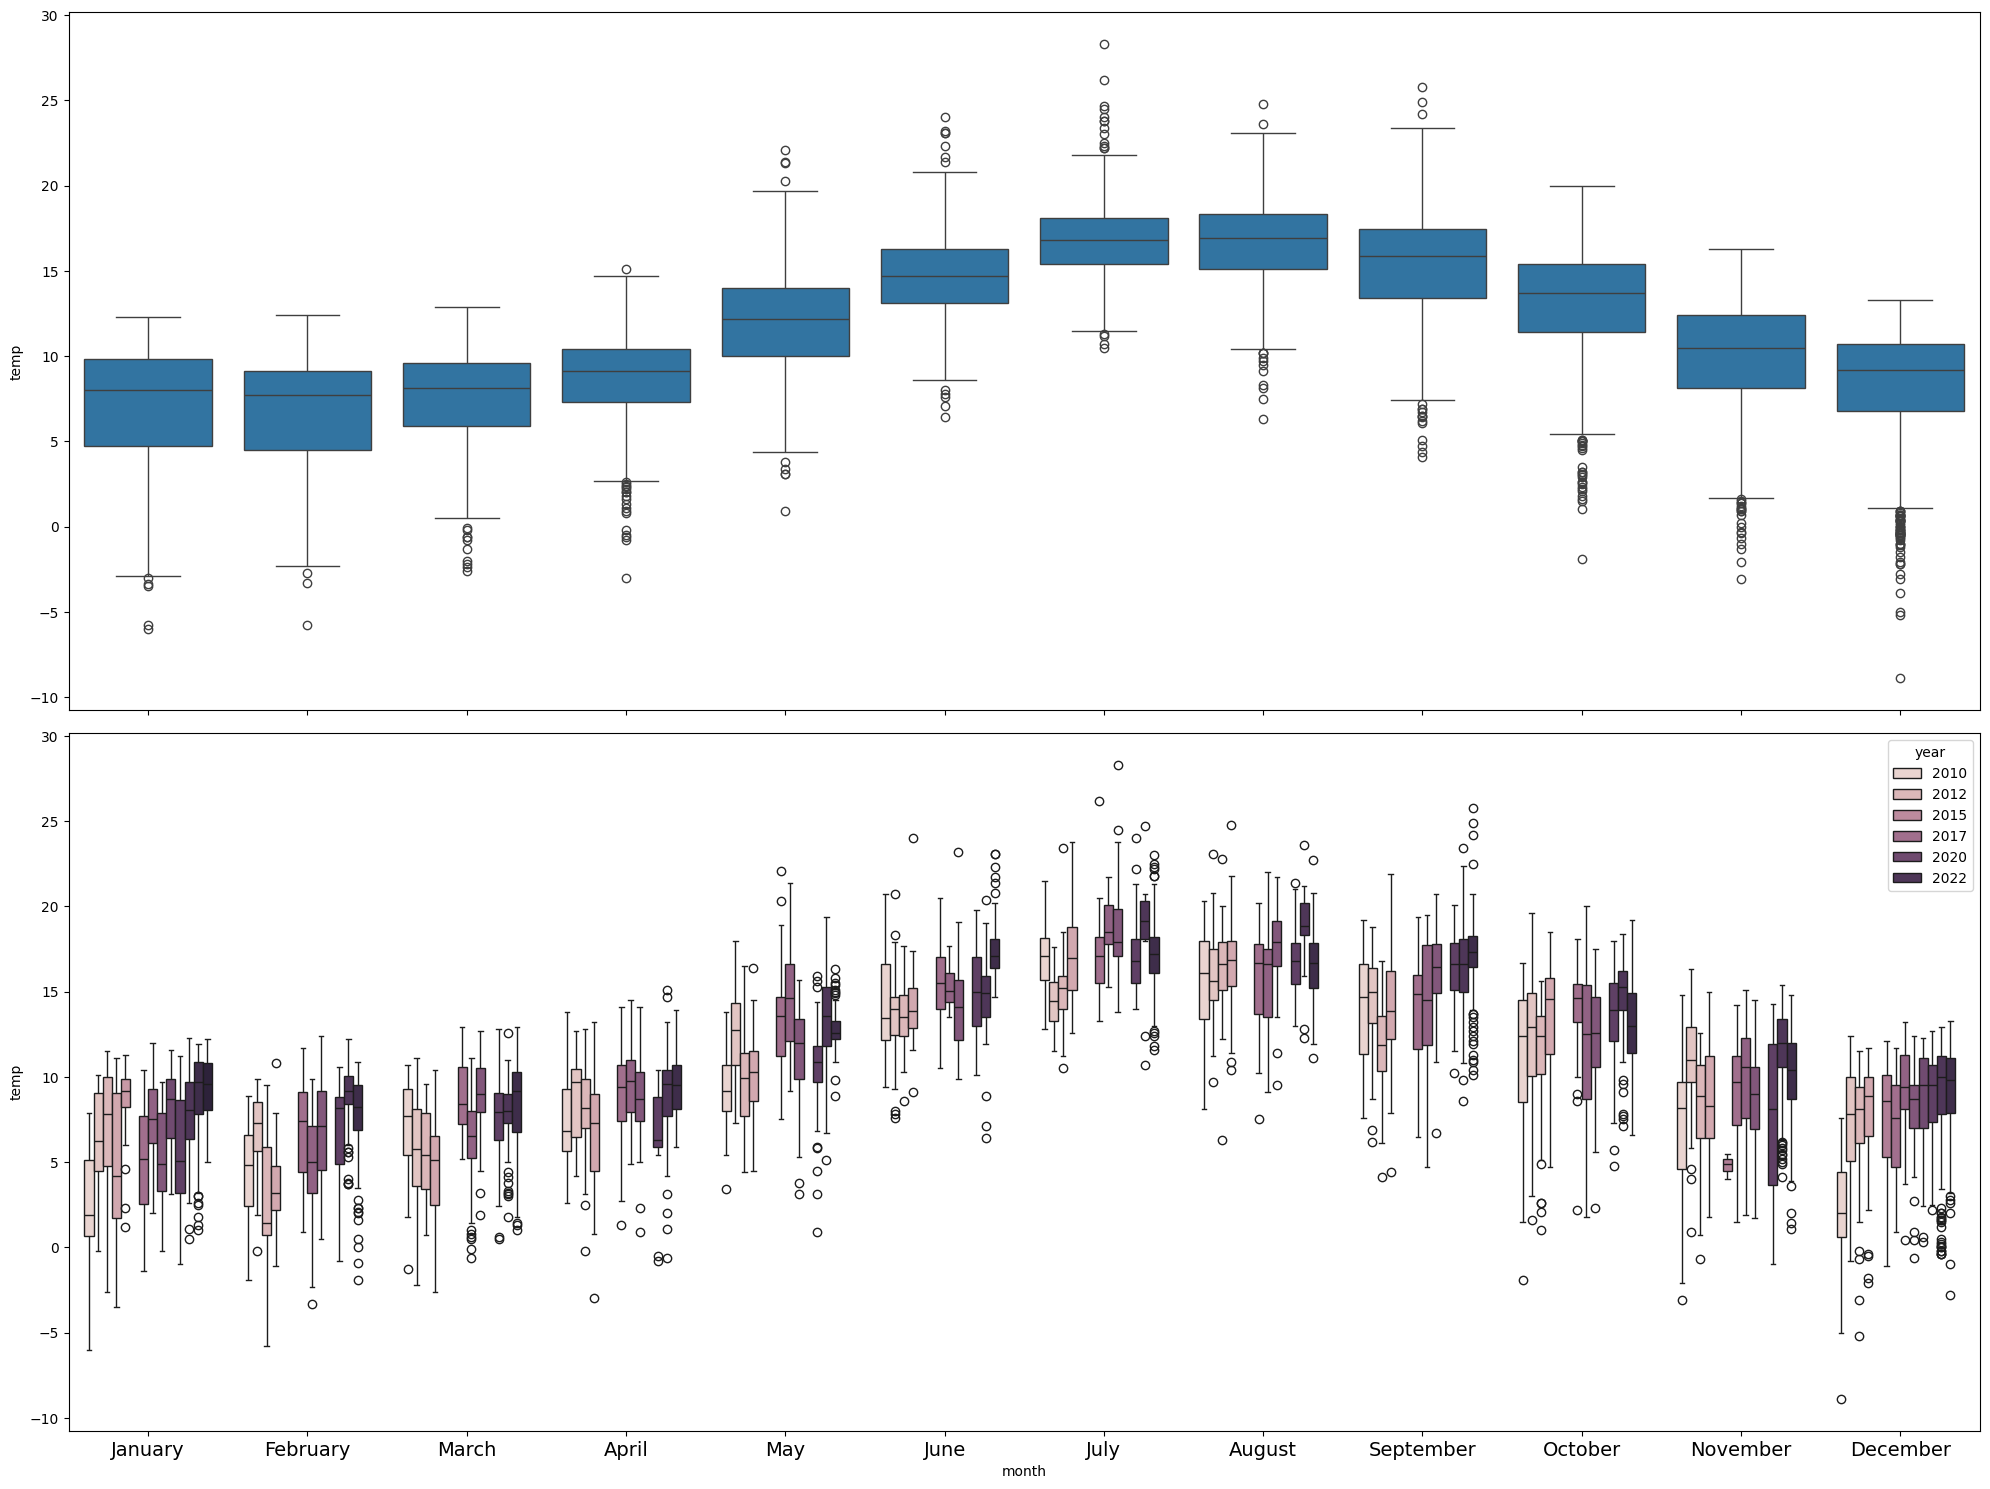

In [168]:
# Visualise trends across years
fix, ax = plt.subplots(2, 1, sharex=True, figsize=(20,15))
sns.boxplot(x='month', y='temp', data=df, ax=ax[0])  # top plot
sns.boxplot(x='month', y='temp', data=df, hue='year', ax=ax[1])  # bottom plot
ax[1].set_xticks(np.arange(0, 12), months_of_the_year, fontsize=14)
plt.tight_layout()

In [169]:
data_ds = df['temp'].resample('M').mean().ffill().to_frame()  # one value per month
data_ds

temp
datetime             
2010-01-31   2.437879
2010-02-28   4.487879
2010-03-31   6.958537
2010-04-30   7.416667
2010-05-31   9.446667
...               ...
2023-09-30  17.044340
2023-10-31  13.368163
2023-11-30  10.163855
2023-12-31   9.299155
2024-01-31   9.251563

[169 rows x 1 columns]

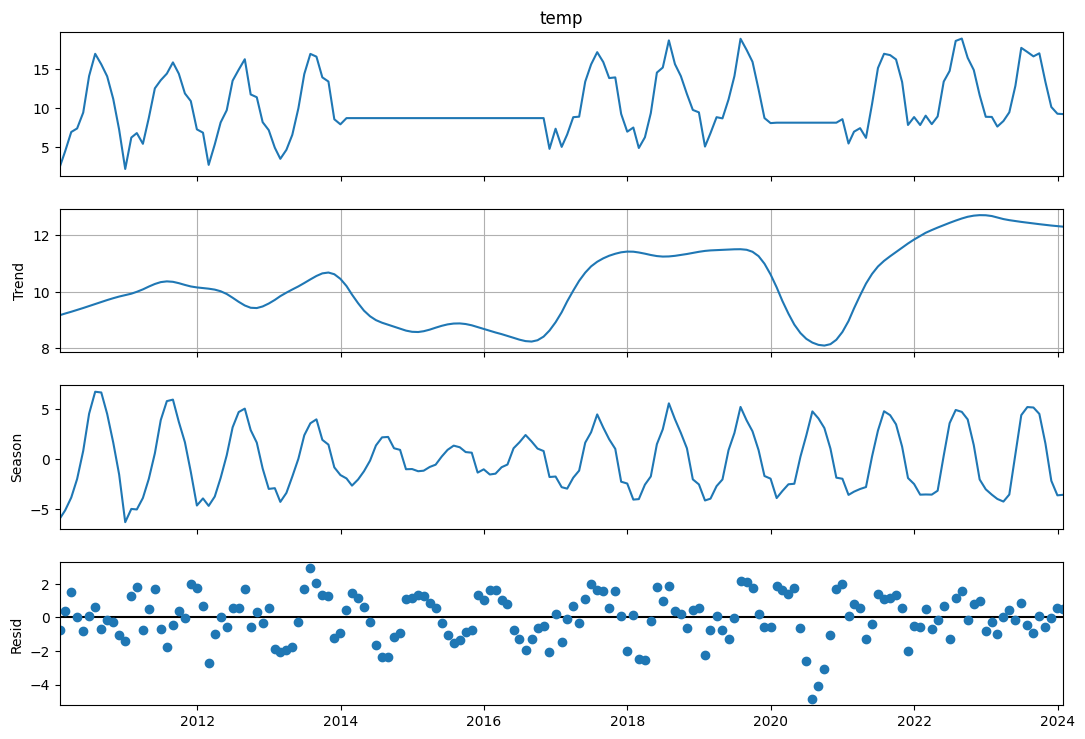

In [170]:
# Try decomposition on the resampled dataset
from statsmodels.tsa.seasonal import seasonal_decompose, STL
decomposition = STL(data_ds['temp']).fit()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.axes[1].grid()

In [171]:
# Statistical test for stationarity: Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(data_ds['temp'])
print('ADF Statistic %.2f:' % adf_result[0])
print('ADF p-value: %.4f:' % adf_result[1])
# p-value << 0.05 ==> timeseries does not have a unit root

ADF Statistic -2.17:
ADF p-value: 0.2180:


In [172]:
adf_result = adfuller(data_ds.loc['2017':'2024', 'temp'])  # ADF test on the full years only. Is there a trend?
print('ADF Statistic %.2f:' % adf_result[0])
print('ADF p-value: %.4f:' % adf_result[1])

ADF Statistic -1.51:
ADF p-value: 0.5292:


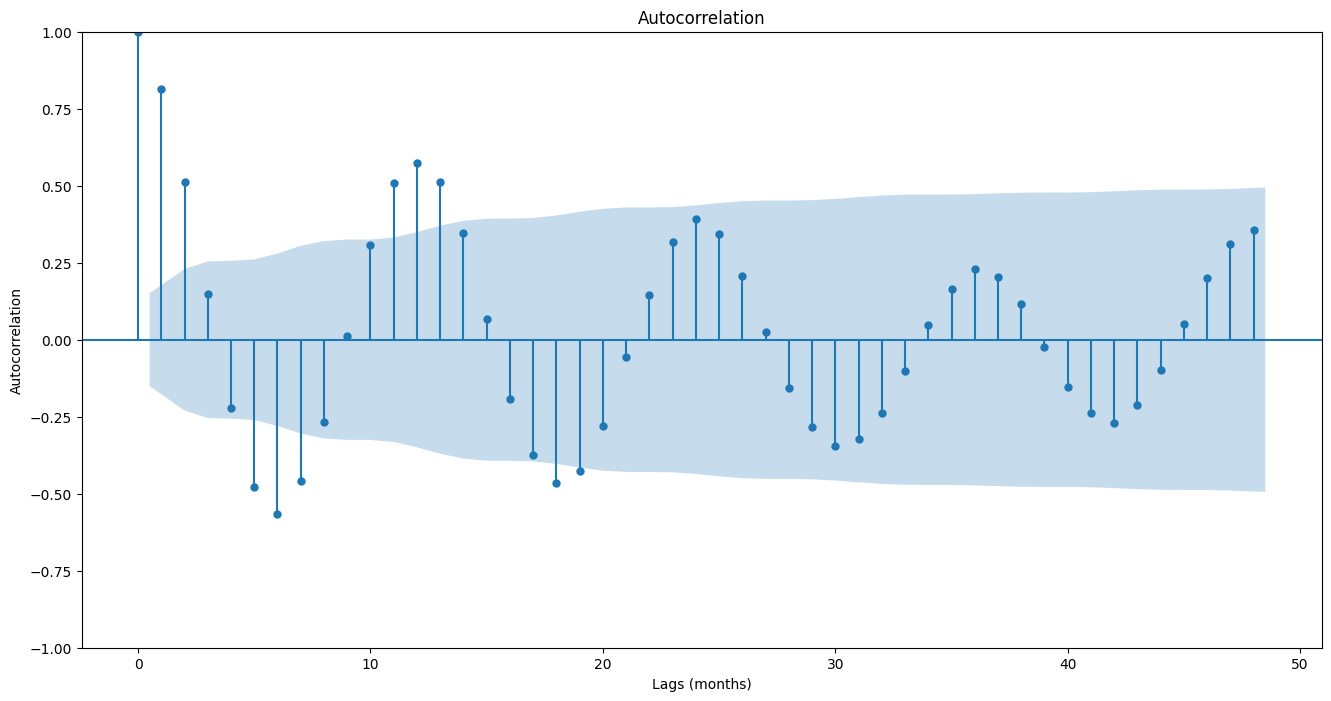

In [173]:
# Autocorrelation (can help us with modelling later)
fig, ax = plt.subplots(figsize=(16,8))
_=plot_acf(data_ds['temp'], lags=48, ax=ax)  # each lag is one month, so we're looking at 4 years worth of past data
_=plt.xlabel('Lags (months)')
_=plt.ylabel('Autocorrelation')

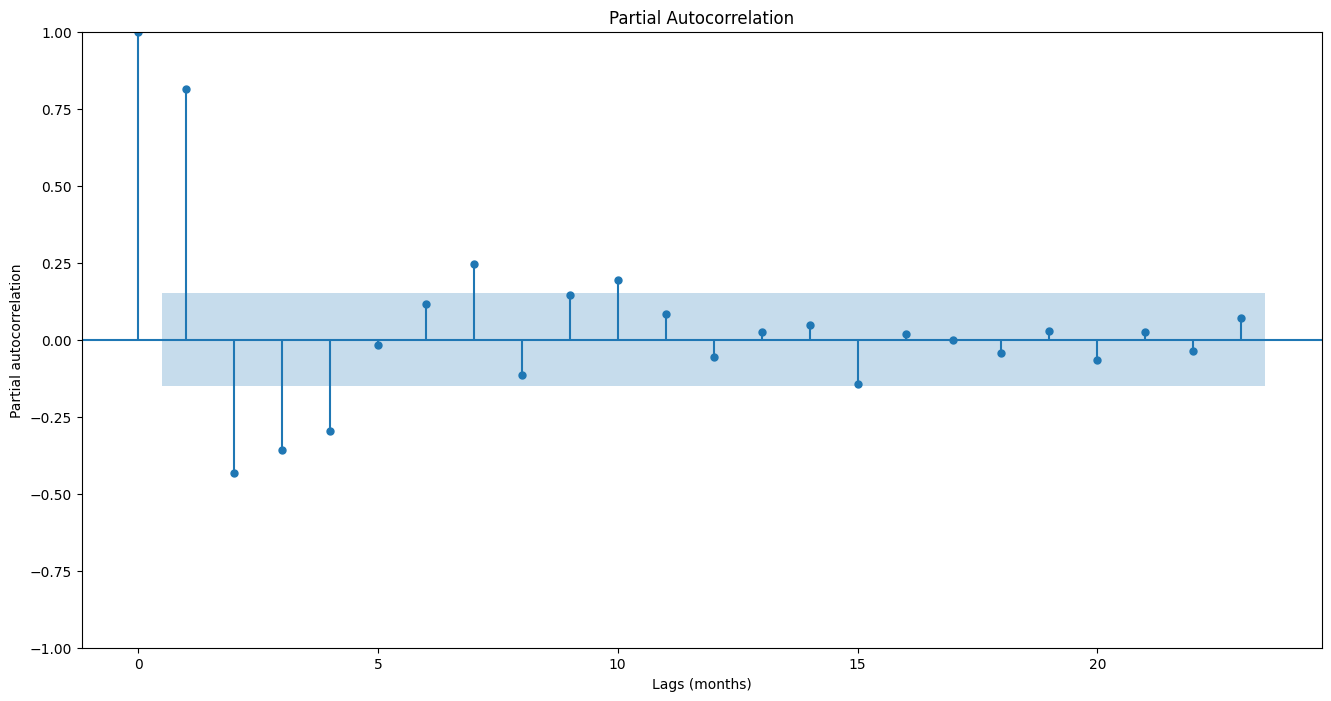

In [174]:
# Partial autocorrelation (can help us with modelling later)
fig, ax = plt.subplots(figsize=(16,8))
_=plot_pacf(data_ds['temp'], ax=ax)
_=plt.xlabel('Lags (months)')
_=plt.ylabel('Partial autocorrelation')

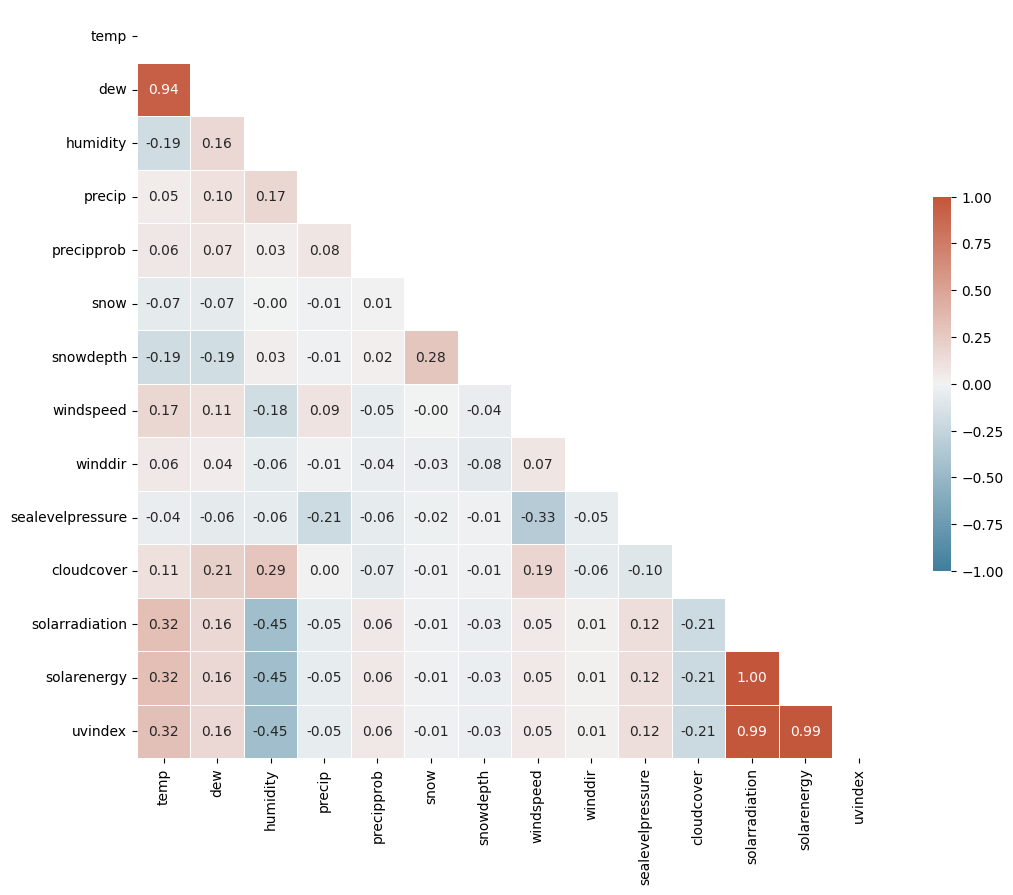

In [175]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.iloc[:, :-3].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.tight_layout()

In [176]:
# Convert columns to numeric type if necessary
df_numeric = df.iloc[:, :-3].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_diff = df_numeric.diff().corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_diff, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_diff, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.tight_layout()
plt.show()

In [177]:
df2 = df.iloc[:, :-3].copy()
df2['temp_avg_lag3'] = df2['temp'].shift(-3)
df2.head()

temp  dew  humidity  precip  precipprob preciptype  snow  \
datetime                                                                        
2010-03-22 06:00:00   5.8  5.7     99.37   0.223       100.0       rain   0.0   
2010-03-22 18:00:00   7.6  7.0     96.32   0.611       100.0       rain   0.0   
2010-03-23 00:00:00   3.9  3.8     99.35   0.928       100.0       rain   0.0   
2010-03-23 06:00:00   1.8  1.8     99.89   0.006       100.0  rain,snow   0.0   
2010-03-23 18:00:00   8.6  8.4     98.53   0.078       100.0       rain   0.0   

                     snowdepth  windspeed  winddir  sealevelpressure  \
datetime                                                               
2010-03-22 06:00:00        0.0        8.9    165.0            1019.5   
2010-03-22 18:00:00        0.0       12.2    188.0            1017.6   
2010-03-23 00:00:00        0.0        4.1    351.0            1019.1   
2010-03-23 06:00:00        0.0        2.0     81.0            1019.2   
2010-03-23 18:00:00        0.0       11.7    127.0            1013.3   

                     cloudcover  solarradiation  solarenergy  uvindex  \
datetime                                                                
2010-03-22 06:00:00        54.2            24.9          0.1      0.0   
2010-03-22 18:00:00        90.0             0.0          0.0      0.0   
2010-03-23 00:00:00        99.3             0.0          0.0      0.0   
2010-03-23 06:00:00        41.0            15.2          0.1      0.0   
2010-03-23 18:00:00        64.1             0.0          0.0      0.0   

                     temp_avg_lag3  
datetime                            
2010-03-22 06:00:00            1.8  
2010-03-22 18:00:00            8.6  
2010-03-23 00:00:00            7.9  
2010-03-23 06:00:00            8.5  
2010-03-23 18:00:00           10.0

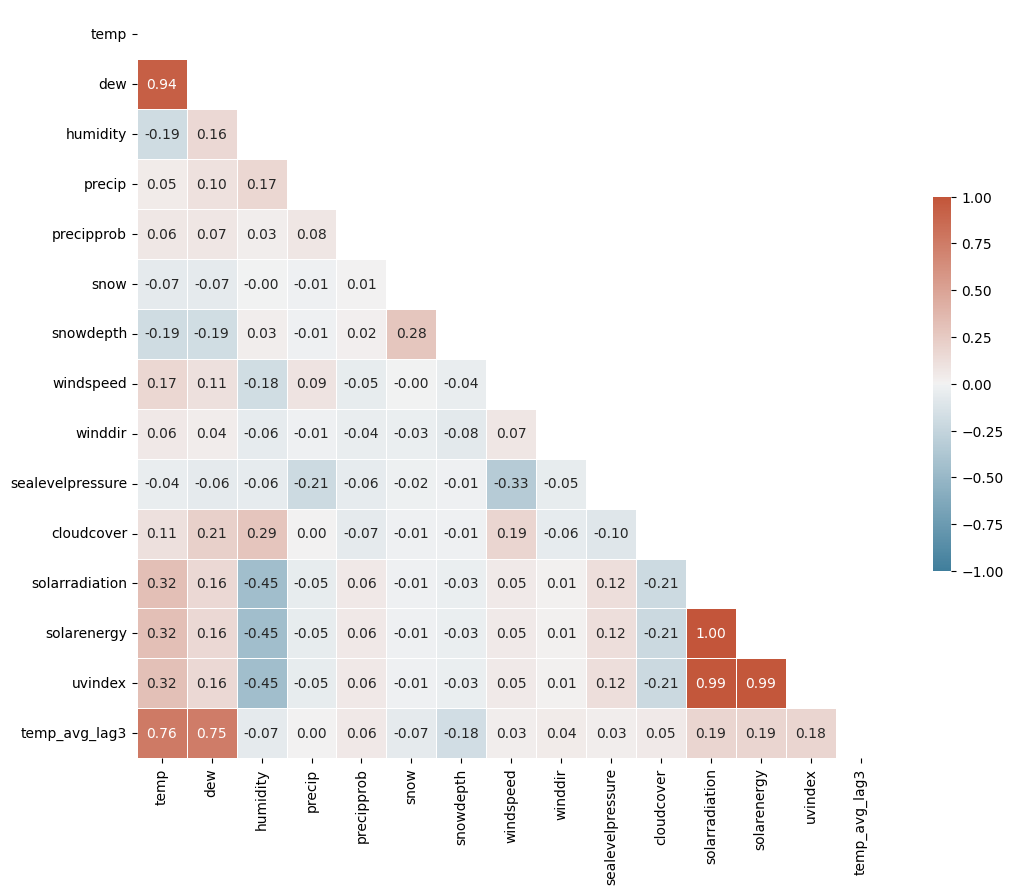

In [178]:
# Let's see what happens if we do the differential operation again.
df2 = df.iloc[:, :-3].copy()
df2['temp_avg_lag3'] = df2['temp'].shift(-3)
corr2 = df2.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.tight_layout()